### [E-02] 손수 설계하는 선형회귀, 당뇨병수치 구하기

#### 1. 데이터 가져오기

In [379]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
diabetes.keys()
print(diabetes.data.shape)
print(diabetes['data'])
print(diabetes['feature_names'])


(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


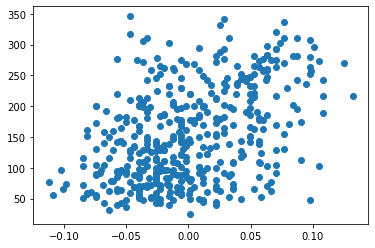

In [380]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[0:,3], diabetes.target)


#### 2. 데이터 준비

In [381]:
df_X = diabetes['data']
df_y = diabetes['target']
df_X
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### 3. 데이터 분리

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape) #훈련데이터
print(X_test.shape, y_test.shape) #테스트데이터

(353, 10) (353,)
(89, 10) (89,)


#### 4. w,b 초기값 설정

In [383]:
# w,b의 초기값 설정 (x가 10개이므로 10개의 w와 1개의 b를 초기화)
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

#  모델
def model(df_X, W, b):
    predictions = 0
    for i in range(10):
        predictions+=predictions + df_X[:, i]*W[i]
    predictions +=b
    return predictions

#### 5. 손실함수 loss 정의하기 (MSE함수)

In [384]:
#손실함수 loss 정의하기 (MSE함수)
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(df_X, W, b, df_y):
    predictions = model(df_X, W, b)
    L = MSE(predictions, df_y)
    return L


#### 6. Gradient 함수구현

In [385]:
# Gradient 함수구현
def gradient(df_X, W, b, df_y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(df_X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * df_X.T.dot(y_pred - df_y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - df_y).mean()
    return dW, db

#### 7. 하이퍼파라미터 학습률 설정

In [392]:
# 하이퍼파라미터 학습률 설정
LEARNING_RATE = 0.00001

#### 8. 모델학습하기

In [393]:
# 모델 학습하기
losses = []

for i in range(1,320000):
    dW, db = gradient(X_train, W, b, y_train)
    W -=LEARNING_RATE * dW
    b -=LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    if i% 10 ==0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2921.5863
Iteration 20 : Loss 2921.5860
Iteration 30 : Loss 2921.5857
Iteration 40 : Loss 2921.5854
Iteration 50 : Loss 2921.5852
Iteration 60 : Loss 2921.5849
Iteration 70 : Loss 2921.5846
Iteration 80 : Loss 2921.5843
Iteration 90 : Loss 2921.5840
Iteration 100 : Loss 2921.5837
Iteration 110 : Loss 2921.5835
Iteration 120 : Loss 2921.5832
Iteration 130 : Loss 2921.5829
Iteration 140 : Loss 2921.5826
Iteration 150 : Loss 2921.5823
Iteration 160 : Loss 2921.5820
Iteration 170 : Loss 2921.5818
Iteration 180 : Loss 2921.5815
Iteration 190 : Loss 2921.5812
Iteration 200 : Loss 2921.5809
Iteration 210 : Loss 2921.5806
Iteration 220 : Loss 2921.5803
Iteration 230 : Loss 2921.5800
Iteration 240 : Loss 2921.5798
Iteration 250 : Loss 2921.5795
Iteration 260 : Loss 2921.5792
Iteration 270 : Loss 2921.5789
Iteration 280 : Loss 2921.5786
Iteration 290 : Loss 2921.5783
Iteration 300 : Loss 2921.5781
Iteration 310 : Loss 2921.5778
Iteration 320 : Loss 2921.5775
Iteration 330 : L

Iteration 2600 : Loss 2921.5130
Iteration 2610 : Loss 2921.5127
Iteration 2620 : Loss 2921.5124
Iteration 2630 : Loss 2921.5122
Iteration 2640 : Loss 2921.5119
Iteration 2650 : Loss 2921.5116
Iteration 2660 : Loss 2921.5113
Iteration 2670 : Loss 2921.5110
Iteration 2680 : Loss 2921.5108
Iteration 2690 : Loss 2921.5105
Iteration 2700 : Loss 2921.5102
Iteration 2710 : Loss 2921.5099
Iteration 2720 : Loss 2921.5096
Iteration 2730 : Loss 2921.5093
Iteration 2740 : Loss 2921.5091
Iteration 2750 : Loss 2921.5088
Iteration 2760 : Loss 2921.5085
Iteration 2770 : Loss 2921.5082
Iteration 2780 : Loss 2921.5079
Iteration 2790 : Loss 2921.5077
Iteration 2800 : Loss 2921.5074
Iteration 2810 : Loss 2921.5071
Iteration 2820 : Loss 2921.5068
Iteration 2830 : Loss 2921.5065
Iteration 2840 : Loss 2921.5062
Iteration 2850 : Loss 2921.5060
Iteration 2860 : Loss 2921.5057
Iteration 2870 : Loss 2921.5054
Iteration 2880 : Loss 2921.5051
Iteration 2890 : Loss 2921.5048
Iteration 2900 : Loss 2921.5046
Iteratio

Iteration 5970 : Loss 2921.4186
Iteration 5980 : Loss 2921.4183
Iteration 5990 : Loss 2921.4180
Iteration 6000 : Loss 2921.4177
Iteration 6010 : Loss 2921.4175
Iteration 6020 : Loss 2921.4172
Iteration 6030 : Loss 2921.4169
Iteration 6040 : Loss 2921.4166
Iteration 6050 : Loss 2921.4163
Iteration 6060 : Loss 2921.4161
Iteration 6070 : Loss 2921.4158
Iteration 6080 : Loss 2921.4155
Iteration 6090 : Loss 2921.4152
Iteration 6100 : Loss 2921.4149
Iteration 6110 : Loss 2921.4147
Iteration 6120 : Loss 2921.4144
Iteration 6130 : Loss 2921.4141
Iteration 6140 : Loss 2921.4138
Iteration 6150 : Loss 2921.4136
Iteration 6160 : Loss 2921.4133
Iteration 6170 : Loss 2921.4130
Iteration 6180 : Loss 2921.4127
Iteration 6190 : Loss 2921.4124
Iteration 6200 : Loss 2921.4122
Iteration 6210 : Loss 2921.4119
Iteration 6220 : Loss 2921.4116
Iteration 6230 : Loss 2921.4113
Iteration 6240 : Loss 2921.4110
Iteration 6250 : Loss 2921.4108
Iteration 6260 : Loss 2921.4105
Iteration 6270 : Loss 2921.4102
Iteratio

Iteration 9360 : Loss 2921.3246
Iteration 9370 : Loss 2921.3243
Iteration 9380 : Loss 2921.3240
Iteration 9390 : Loss 2921.3238
Iteration 9400 : Loss 2921.3235
Iteration 9410 : Loss 2921.3232
Iteration 9420 : Loss 2921.3229
Iteration 9430 : Loss 2921.3227
Iteration 9440 : Loss 2921.3224
Iteration 9450 : Loss 2921.3221
Iteration 9460 : Loss 2921.3218
Iteration 9470 : Loss 2921.3216
Iteration 9480 : Loss 2921.3213
Iteration 9490 : Loss 2921.3210
Iteration 9500 : Loss 2921.3207
Iteration 9510 : Loss 2921.3205
Iteration 9520 : Loss 2921.3202
Iteration 9530 : Loss 2921.3199
Iteration 9540 : Loss 2921.3196
Iteration 9550 : Loss 2921.3194
Iteration 9560 : Loss 2921.3191
Iteration 9570 : Loss 2921.3188
Iteration 9580 : Loss 2921.3185
Iteration 9590 : Loss 2921.3183
Iteration 9600 : Loss 2921.3180
Iteration 9610 : Loss 2921.3177
Iteration 9620 : Loss 2921.3174
Iteration 9630 : Loss 2921.3172
Iteration 9640 : Loss 2921.3169
Iteration 9650 : Loss 2921.3166
Iteration 9660 : Loss 2921.3163
Iteratio

Iteration 11910 : Loss 2921.2546
Iteration 11920 : Loss 2921.2543
Iteration 11930 : Loss 2921.2540
Iteration 11940 : Loss 2921.2537
Iteration 11950 : Loss 2921.2535
Iteration 11960 : Loss 2921.2532
Iteration 11970 : Loss 2921.2529
Iteration 11980 : Loss 2921.2527
Iteration 11990 : Loss 2921.2524
Iteration 12000 : Loss 2921.2521
Iteration 12010 : Loss 2921.2518
Iteration 12020 : Loss 2921.2516
Iteration 12030 : Loss 2921.2513
Iteration 12040 : Loss 2921.2510
Iteration 12050 : Loss 2921.2507
Iteration 12060 : Loss 2921.2505
Iteration 12070 : Loss 2921.2502
Iteration 12080 : Loss 2921.2499
Iteration 12090 : Loss 2921.2496
Iteration 12100 : Loss 2921.2494
Iteration 12110 : Loss 2921.2491
Iteration 12120 : Loss 2921.2488
Iteration 12130 : Loss 2921.2486
Iteration 12140 : Loss 2921.2483
Iteration 12150 : Loss 2921.2480
Iteration 12160 : Loss 2921.2477
Iteration 12170 : Loss 2921.2475
Iteration 12180 : Loss 2921.2472
Iteration 12190 : Loss 2921.2469
Iteration 12200 : Loss 2921.2466
Iteration 

Iteration 14420 : Loss 2921.1862
Iteration 14430 : Loss 2921.1859
Iteration 14440 : Loss 2921.1856
Iteration 14450 : Loss 2921.1854
Iteration 14460 : Loss 2921.1851
Iteration 14470 : Loss 2921.1848
Iteration 14480 : Loss 2921.1846
Iteration 14490 : Loss 2921.1843
Iteration 14500 : Loss 2921.1840
Iteration 14510 : Loss 2921.1837
Iteration 14520 : Loss 2921.1835
Iteration 14530 : Loss 2921.1832
Iteration 14540 : Loss 2921.1829
Iteration 14550 : Loss 2921.1827
Iteration 14560 : Loss 2921.1824
Iteration 14570 : Loss 2921.1821
Iteration 14580 : Loss 2921.1818
Iteration 14590 : Loss 2921.1816
Iteration 14600 : Loss 2921.1813
Iteration 14610 : Loss 2921.1810
Iteration 14620 : Loss 2921.1808
Iteration 14630 : Loss 2921.1805
Iteration 14640 : Loss 2921.1802
Iteration 14650 : Loss 2921.1799
Iteration 14660 : Loss 2921.1797
Iteration 14670 : Loss 2921.1794
Iteration 14680 : Loss 2921.1791
Iteration 14690 : Loss 2921.1789
Iteration 14700 : Loss 2921.1786
Iteration 14710 : Loss 2921.1783
Iteration 

Iteration 16960 : Loss 2921.1175
Iteration 16970 : Loss 2921.1173
Iteration 16980 : Loss 2921.1170
Iteration 16990 : Loss 2921.1167
Iteration 17000 : Loss 2921.1164
Iteration 17010 : Loss 2921.1162
Iteration 17020 : Loss 2921.1159
Iteration 17030 : Loss 2921.1156
Iteration 17040 : Loss 2921.1154
Iteration 17050 : Loss 2921.1151
Iteration 17060 : Loss 2921.1148
Iteration 17070 : Loss 2921.1146
Iteration 17080 : Loss 2921.1143
Iteration 17090 : Loss 2921.1140
Iteration 17100 : Loss 2921.1138
Iteration 17110 : Loss 2921.1135
Iteration 17120 : Loss 2921.1132
Iteration 17130 : Loss 2921.1129
Iteration 17140 : Loss 2921.1127
Iteration 17150 : Loss 2921.1124
Iteration 17160 : Loss 2921.1121
Iteration 17170 : Loss 2921.1119
Iteration 17180 : Loss 2921.1116
Iteration 17190 : Loss 2921.1113
Iteration 17200 : Loss 2921.1111
Iteration 17210 : Loss 2921.1108
Iteration 17220 : Loss 2921.1105
Iteration 17230 : Loss 2921.1103
Iteration 17240 : Loss 2921.1100
Iteration 17250 : Loss 2921.1097
Iteration 

Iteration 19490 : Loss 2921.0497
Iteration 19500 : Loss 2921.0494
Iteration 19510 : Loss 2921.0491
Iteration 19520 : Loss 2921.0489
Iteration 19530 : Loss 2921.0486
Iteration 19540 : Loss 2921.0483
Iteration 19550 : Loss 2921.0481
Iteration 19560 : Loss 2921.0478
Iteration 19570 : Loss 2921.0475
Iteration 19580 : Loss 2921.0473
Iteration 19590 : Loss 2921.0470
Iteration 19600 : Loss 2921.0467
Iteration 19610 : Loss 2921.0465
Iteration 19620 : Loss 2921.0462
Iteration 19630 : Loss 2921.0459
Iteration 19640 : Loss 2921.0457
Iteration 19650 : Loss 2921.0454
Iteration 19660 : Loss 2921.0451
Iteration 19670 : Loss 2921.0449
Iteration 19680 : Loss 2921.0446
Iteration 19690 : Loss 2921.0443
Iteration 19700 : Loss 2921.0441
Iteration 19710 : Loss 2921.0438
Iteration 19720 : Loss 2921.0435
Iteration 19730 : Loss 2921.0432
Iteration 19740 : Loss 2921.0430
Iteration 19750 : Loss 2921.0427
Iteration 19760 : Loss 2921.0424
Iteration 19770 : Loss 2921.0422
Iteration 19780 : Loss 2921.0419
Iteration 

Iteration 22070 : Loss 2920.9810
Iteration 22080 : Loss 2920.9807
Iteration 22090 : Loss 2920.9805
Iteration 22100 : Loss 2920.9802
Iteration 22110 : Loss 2920.9799
Iteration 22120 : Loss 2920.9797
Iteration 22130 : Loss 2920.9794
Iteration 22140 : Loss 2920.9791
Iteration 22150 : Loss 2920.9789
Iteration 22160 : Loss 2920.9786
Iteration 22170 : Loss 2920.9783
Iteration 22180 : Loss 2920.9781
Iteration 22190 : Loss 2920.9778
Iteration 22200 : Loss 2920.9775
Iteration 22210 : Loss 2920.9773
Iteration 22220 : Loss 2920.9770
Iteration 22230 : Loss 2920.9767
Iteration 22240 : Loss 2920.9765
Iteration 22250 : Loss 2920.9762
Iteration 22260 : Loss 2920.9760
Iteration 22270 : Loss 2920.9757
Iteration 22280 : Loss 2920.9754
Iteration 22290 : Loss 2920.9752
Iteration 22300 : Loss 2920.9749
Iteration 22310 : Loss 2920.9746
Iteration 22320 : Loss 2920.9744
Iteration 22330 : Loss 2920.9741
Iteration 22340 : Loss 2920.9738
Iteration 22350 : Loss 2920.9736
Iteration 22360 : Loss 2920.9733
Iteration 

Iteration 24610 : Loss 2920.9139
Iteration 24620 : Loss 2920.9136
Iteration 24630 : Loss 2920.9134
Iteration 24640 : Loss 2920.9131
Iteration 24650 : Loss 2920.9128
Iteration 24660 : Loss 2920.9126
Iteration 24670 : Loss 2920.9123
Iteration 24680 : Loss 2920.9121
Iteration 24690 : Loss 2920.9118
Iteration 24700 : Loss 2920.9115
Iteration 24710 : Loss 2920.9113
Iteration 24720 : Loss 2920.9110
Iteration 24730 : Loss 2920.9107
Iteration 24740 : Loss 2920.9105
Iteration 24750 : Loss 2920.9102
Iteration 24760 : Loss 2920.9099
Iteration 24770 : Loss 2920.9097
Iteration 24780 : Loss 2920.9094
Iteration 24790 : Loss 2920.9092
Iteration 24800 : Loss 2920.9089
Iteration 24810 : Loss 2920.9086
Iteration 24820 : Loss 2920.9084
Iteration 24830 : Loss 2920.9081
Iteration 24840 : Loss 2920.9078
Iteration 24850 : Loss 2920.9076
Iteration 24860 : Loss 2920.9073
Iteration 24870 : Loss 2920.9071
Iteration 24880 : Loss 2920.9068
Iteration 24890 : Loss 2920.9065
Iteration 24900 : Loss 2920.9063
Iteration 

Iteration 27250 : Loss 2920.8447
Iteration 27260 : Loss 2920.8444
Iteration 27270 : Loss 2920.8442
Iteration 27280 : Loss 2920.8439
Iteration 27290 : Loss 2920.8436
Iteration 27300 : Loss 2920.8434
Iteration 27310 : Loss 2920.8431
Iteration 27320 : Loss 2920.8429
Iteration 27330 : Loss 2920.8426
Iteration 27340 : Loss 2920.8423
Iteration 27350 : Loss 2920.8421
Iteration 27360 : Loss 2920.8418
Iteration 27370 : Loss 2920.8416
Iteration 27380 : Loss 2920.8413
Iteration 27390 : Loss 2920.8410
Iteration 27400 : Loss 2920.8408
Iteration 27410 : Loss 2920.8405
Iteration 27420 : Loss 2920.8403
Iteration 27430 : Loss 2920.8400
Iteration 27440 : Loss 2920.8397
Iteration 27450 : Loss 2920.8395
Iteration 27460 : Loss 2920.8392
Iteration 27470 : Loss 2920.8390
Iteration 27480 : Loss 2920.8387
Iteration 27490 : Loss 2920.8384
Iteration 27500 : Loss 2920.8382
Iteration 27510 : Loss 2920.8379
Iteration 27520 : Loss 2920.8376
Iteration 27530 : Loss 2920.8374
Iteration 27540 : Loss 2920.8371
Iteration 

Iteration 30600 : Loss 2920.7576
Iteration 30610 : Loss 2920.7574
Iteration 30620 : Loss 2920.7571
Iteration 30630 : Loss 2920.7569
Iteration 30640 : Loss 2920.7566
Iteration 30650 : Loss 2920.7564
Iteration 30660 : Loss 2920.7561
Iteration 30670 : Loss 2920.7558
Iteration 30680 : Loss 2920.7556
Iteration 30690 : Loss 2920.7553
Iteration 30700 : Loss 2920.7551
Iteration 30710 : Loss 2920.7548
Iteration 30720 : Loss 2920.7545
Iteration 30730 : Loss 2920.7543
Iteration 30740 : Loss 2920.7540
Iteration 30750 : Loss 2920.7538
Iteration 30760 : Loss 2920.7535
Iteration 30770 : Loss 2920.7532
Iteration 30780 : Loss 2920.7530
Iteration 30790 : Loss 2920.7527
Iteration 30800 : Loss 2920.7525
Iteration 30810 : Loss 2920.7522
Iteration 30820 : Loss 2920.7520
Iteration 30830 : Loss 2920.7517
Iteration 30840 : Loss 2920.7514
Iteration 30850 : Loss 2920.7512
Iteration 30860 : Loss 2920.7509
Iteration 30870 : Loss 2920.7507
Iteration 30880 : Loss 2920.7504
Iteration 30890 : Loss 2920.7501
Iteration 

Iteration 34160 : Loss 2920.6660
Iteration 34170 : Loss 2920.6658
Iteration 34180 : Loss 2920.6655
Iteration 34190 : Loss 2920.6653
Iteration 34200 : Loss 2920.6650
Iteration 34210 : Loss 2920.6648
Iteration 34220 : Loss 2920.6645
Iteration 34230 : Loss 2920.6643
Iteration 34240 : Loss 2920.6640
Iteration 34250 : Loss 2920.6637
Iteration 34260 : Loss 2920.6635
Iteration 34270 : Loss 2920.6632
Iteration 34280 : Loss 2920.6630
Iteration 34290 : Loss 2920.6627
Iteration 34300 : Loss 2920.6625
Iteration 34310 : Loss 2920.6622
Iteration 34320 : Loss 2920.6620
Iteration 34330 : Loss 2920.6617
Iteration 34340 : Loss 2920.6614
Iteration 34350 : Loss 2920.6612
Iteration 34360 : Loss 2920.6609
Iteration 34370 : Loss 2920.6607
Iteration 34380 : Loss 2920.6604
Iteration 34390 : Loss 2920.6602
Iteration 34400 : Loss 2920.6599
Iteration 34410 : Loss 2920.6597
Iteration 34420 : Loss 2920.6594
Iteration 34430 : Loss 2920.6591
Iteration 34440 : Loss 2920.6589
Iteration 34450 : Loss 2920.6586
Iteration 

Iteration 37620 : Loss 2920.5779
Iteration 37630 : Loss 2920.5777
Iteration 37640 : Loss 2920.5774
Iteration 37650 : Loss 2920.5771
Iteration 37660 : Loss 2920.5769
Iteration 37670 : Loss 2920.5766
Iteration 37680 : Loss 2920.5764
Iteration 37690 : Loss 2920.5761
Iteration 37700 : Loss 2920.5759
Iteration 37710 : Loss 2920.5756
Iteration 37720 : Loss 2920.5754
Iteration 37730 : Loss 2920.5751
Iteration 37740 : Loss 2920.5749
Iteration 37750 : Loss 2920.5746
Iteration 37760 : Loss 2920.5744
Iteration 37770 : Loss 2920.5741
Iteration 37780 : Loss 2920.5739
Iteration 37790 : Loss 2920.5736
Iteration 37800 : Loss 2920.5733
Iteration 37810 : Loss 2920.5731
Iteration 37820 : Loss 2920.5728
Iteration 37830 : Loss 2920.5726
Iteration 37840 : Loss 2920.5723
Iteration 37850 : Loss 2920.5721
Iteration 37860 : Loss 2920.5718
Iteration 37870 : Loss 2920.5716
Iteration 37880 : Loss 2920.5713
Iteration 37890 : Loss 2920.5711
Iteration 37900 : Loss 2920.5708
Iteration 37910 : Loss 2920.5706
Iteration 

Iteration 40980 : Loss 2920.4931
Iteration 40990 : Loss 2920.4929
Iteration 41000 : Loss 2920.4926
Iteration 41010 : Loss 2920.4924
Iteration 41020 : Loss 2920.4921
Iteration 41030 : Loss 2920.4919
Iteration 41040 : Loss 2920.4916
Iteration 41050 : Loss 2920.4914
Iteration 41060 : Loss 2920.4911
Iteration 41070 : Loss 2920.4909
Iteration 41080 : Loss 2920.4906
Iteration 41090 : Loss 2920.4904
Iteration 41100 : Loss 2920.4901
Iteration 41110 : Loss 2920.4899
Iteration 41120 : Loss 2920.4896
Iteration 41130 : Loss 2920.4894
Iteration 41140 : Loss 2920.4891
Iteration 41150 : Loss 2920.4889
Iteration 41160 : Loss 2920.4886
Iteration 41170 : Loss 2920.4883
Iteration 41180 : Loss 2920.4881
Iteration 41190 : Loss 2920.4878
Iteration 41200 : Loss 2920.4876
Iteration 41210 : Loss 2920.4873
Iteration 41220 : Loss 2920.4871
Iteration 41230 : Loss 2920.4868
Iteration 41240 : Loss 2920.4866
Iteration 41250 : Loss 2920.4863
Iteration 41260 : Loss 2920.4861
Iteration 41270 : Loss 2920.4858
Iteration 

Iteration 44370 : Loss 2920.4084
Iteration 44380 : Loss 2920.4081
Iteration 44390 : Loss 2920.4079
Iteration 44400 : Loss 2920.4076
Iteration 44410 : Loss 2920.4074
Iteration 44420 : Loss 2920.4071
Iteration 44430 : Loss 2920.4069
Iteration 44440 : Loss 2920.4066
Iteration 44450 : Loss 2920.4064
Iteration 44460 : Loss 2920.4061
Iteration 44470 : Loss 2920.4059
Iteration 44480 : Loss 2920.4056
Iteration 44490 : Loss 2920.4054
Iteration 44500 : Loss 2920.4051
Iteration 44510 : Loss 2920.4049
Iteration 44520 : Loss 2920.4046
Iteration 44530 : Loss 2920.4044
Iteration 44540 : Loss 2920.4041
Iteration 44550 : Loss 2920.4039
Iteration 44560 : Loss 2920.4036
Iteration 44570 : Loss 2920.4034
Iteration 44580 : Loss 2920.4031
Iteration 44590 : Loss 2920.4029
Iteration 44600 : Loss 2920.4026
Iteration 44610 : Loss 2920.4024
Iteration 44620 : Loss 2920.4021
Iteration 44630 : Loss 2920.4019
Iteration 44640 : Loss 2920.4016
Iteration 44650 : Loss 2920.4014
Iteration 44660 : Loss 2920.4011
Iteration 

Iteration 47680 : Loss 2920.3263
Iteration 47690 : Loss 2920.3261
Iteration 47700 : Loss 2920.3259
Iteration 47710 : Loss 2920.3256
Iteration 47720 : Loss 2920.3254
Iteration 47730 : Loss 2920.3251
Iteration 47740 : Loss 2920.3249
Iteration 47750 : Loss 2920.3246
Iteration 47760 : Loss 2920.3244
Iteration 47770 : Loss 2920.3241
Iteration 47780 : Loss 2920.3239
Iteration 47790 : Loss 2920.3236
Iteration 47800 : Loss 2920.3234
Iteration 47810 : Loss 2920.3231
Iteration 47820 : Loss 2920.3229
Iteration 47830 : Loss 2920.3226
Iteration 47840 : Loss 2920.3224
Iteration 47850 : Loss 2920.3222
Iteration 47860 : Loss 2920.3219
Iteration 47870 : Loss 2920.3217
Iteration 47880 : Loss 2920.3214
Iteration 47890 : Loss 2920.3212
Iteration 47900 : Loss 2920.3209
Iteration 47910 : Loss 2920.3207
Iteration 47920 : Loss 2920.3204
Iteration 47930 : Loss 2920.3202
Iteration 47940 : Loss 2920.3199
Iteration 47950 : Loss 2920.3197
Iteration 47960 : Loss 2920.3194
Iteration 47970 : Loss 2920.3192
Iteration 

Iteration 51060 : Loss 2920.2433
Iteration 51070 : Loss 2920.2431
Iteration 51080 : Loss 2920.2429
Iteration 51090 : Loss 2920.2426
Iteration 51100 : Loss 2920.2424
Iteration 51110 : Loss 2920.2421
Iteration 51120 : Loss 2920.2419
Iteration 51130 : Loss 2920.2416
Iteration 51140 : Loss 2920.2414
Iteration 51150 : Loss 2920.2411
Iteration 51160 : Loss 2920.2409
Iteration 51170 : Loss 2920.2407
Iteration 51180 : Loss 2920.2404
Iteration 51190 : Loss 2920.2402
Iteration 51200 : Loss 2920.2399
Iteration 51210 : Loss 2920.2397
Iteration 51220 : Loss 2920.2394
Iteration 51230 : Loss 2920.2392
Iteration 51240 : Loss 2920.2389
Iteration 51250 : Loss 2920.2387
Iteration 51260 : Loss 2920.2385
Iteration 51270 : Loss 2920.2382
Iteration 51280 : Loss 2920.2380
Iteration 51290 : Loss 2920.2377
Iteration 51300 : Loss 2920.2375
Iteration 51310 : Loss 2920.2372
Iteration 51320 : Loss 2920.2370
Iteration 51330 : Loss 2920.2367
Iteration 51340 : Loss 2920.2365
Iteration 51350 : Loss 2920.2363
Iteration 

Iteration 54240 : Loss 2920.1659
Iteration 54250 : Loss 2920.1657
Iteration 54260 : Loss 2920.1654
Iteration 54270 : Loss 2920.1652
Iteration 54280 : Loss 2920.1649
Iteration 54290 : Loss 2920.1647
Iteration 54300 : Loss 2920.1645
Iteration 54310 : Loss 2920.1642
Iteration 54320 : Loss 2920.1640
Iteration 54330 : Loss 2920.1637
Iteration 54340 : Loss 2920.1635
Iteration 54350 : Loss 2920.1632
Iteration 54360 : Loss 2920.1630
Iteration 54370 : Loss 2920.1628
Iteration 54380 : Loss 2920.1625
Iteration 54390 : Loss 2920.1623
Iteration 54400 : Loss 2920.1620
Iteration 54410 : Loss 2920.1618
Iteration 54420 : Loss 2920.1615
Iteration 54430 : Loss 2920.1613
Iteration 54440 : Loss 2920.1611
Iteration 54450 : Loss 2920.1608
Iteration 54460 : Loss 2920.1606
Iteration 54470 : Loss 2920.1603
Iteration 54480 : Loss 2920.1601
Iteration 54490 : Loss 2920.1598
Iteration 54500 : Loss 2920.1596
Iteration 54510 : Loss 2920.1594
Iteration 54520 : Loss 2920.1591
Iteration 54530 : Loss 2920.1589
Iteration 

Iteration 57650 : Loss 2920.0836
Iteration 57660 : Loss 2920.0833
Iteration 57670 : Loss 2920.0831
Iteration 57680 : Loss 2920.0829
Iteration 57690 : Loss 2920.0826
Iteration 57700 : Loss 2920.0824
Iteration 57710 : Loss 2920.0821
Iteration 57720 : Loss 2920.0819
Iteration 57730 : Loss 2920.0817
Iteration 57740 : Loss 2920.0814
Iteration 57750 : Loss 2920.0812
Iteration 57760 : Loss 2920.0809
Iteration 57770 : Loss 2920.0807
Iteration 57780 : Loss 2920.0805
Iteration 57790 : Loss 2920.0802
Iteration 57800 : Loss 2920.0800
Iteration 57810 : Loss 2920.0797
Iteration 57820 : Loss 2920.0795
Iteration 57830 : Loss 2920.0792
Iteration 57840 : Loss 2920.0790
Iteration 57850 : Loss 2920.0788
Iteration 57860 : Loss 2920.0785
Iteration 57870 : Loss 2920.0783
Iteration 57880 : Loss 2920.0780
Iteration 57890 : Loss 2920.0778
Iteration 57900 : Loss 2920.0776
Iteration 57910 : Loss 2920.0773
Iteration 57920 : Loss 2920.0771
Iteration 57930 : Loss 2920.0768
Iteration 57940 : Loss 2920.0766
Iteration 

Iteration 61050 : Loss 2920.0022
Iteration 61060 : Loss 2920.0019
Iteration 61070 : Loss 2920.0017
Iteration 61080 : Loss 2920.0015
Iteration 61090 : Loss 2920.0012
Iteration 61100 : Loss 2920.0010
Iteration 61110 : Loss 2920.0008
Iteration 61120 : Loss 2920.0005
Iteration 61130 : Loss 2920.0003
Iteration 61140 : Loss 2920.0000
Iteration 61150 : Loss 2919.9998
Iteration 61160 : Loss 2919.9996
Iteration 61170 : Loss 2919.9993
Iteration 61180 : Loss 2919.9991
Iteration 61190 : Loss 2919.9989
Iteration 61200 : Loss 2919.9986
Iteration 61210 : Loss 2919.9984
Iteration 61220 : Loss 2919.9981
Iteration 61230 : Loss 2919.9979
Iteration 61240 : Loss 2919.9977
Iteration 61250 : Loss 2919.9974
Iteration 61260 : Loss 2919.9972
Iteration 61270 : Loss 2919.9969
Iteration 61280 : Loss 2919.9967
Iteration 61290 : Loss 2919.9965
Iteration 61300 : Loss 2919.9962
Iteration 61310 : Loss 2919.9960
Iteration 61320 : Loss 2919.9958
Iteration 61330 : Loss 2919.9955
Iteration 61340 : Loss 2919.9953
Iteration 

Iteration 64400 : Loss 2919.9227
Iteration 64410 : Loss 2919.9224
Iteration 64420 : Loss 2919.9222
Iteration 64430 : Loss 2919.9220
Iteration 64440 : Loss 2919.9217
Iteration 64450 : Loss 2919.9215
Iteration 64460 : Loss 2919.9212
Iteration 64470 : Loss 2919.9210
Iteration 64480 : Loss 2919.9208
Iteration 64490 : Loss 2919.9205
Iteration 64500 : Loss 2919.9203
Iteration 64510 : Loss 2919.9201
Iteration 64520 : Loss 2919.9198
Iteration 64530 : Loss 2919.9196
Iteration 64540 : Loss 2919.9194
Iteration 64550 : Loss 2919.9191
Iteration 64560 : Loss 2919.9189
Iteration 64570 : Loss 2919.9186
Iteration 64580 : Loss 2919.9184
Iteration 64590 : Loss 2919.9182
Iteration 64600 : Loss 2919.9179
Iteration 64610 : Loss 2919.9177
Iteration 64620 : Loss 2919.9175
Iteration 64630 : Loss 2919.9172
Iteration 64640 : Loss 2919.9170
Iteration 64650 : Loss 2919.9168
Iteration 64660 : Loss 2919.9165
Iteration 64670 : Loss 2919.9163
Iteration 64680 : Loss 2919.9160
Iteration 64690 : Loss 2919.9158
Iteration 

Iteration 67770 : Loss 2919.8433
Iteration 67780 : Loss 2919.8431
Iteration 67790 : Loss 2919.8429
Iteration 67800 : Loss 2919.8426
Iteration 67810 : Loss 2919.8424
Iteration 67820 : Loss 2919.8422
Iteration 67830 : Loss 2919.8419
Iteration 67840 : Loss 2919.8417
Iteration 67850 : Loss 2919.8414
Iteration 67860 : Loss 2919.8412
Iteration 67870 : Loss 2919.8410
Iteration 67880 : Loss 2919.8407
Iteration 67890 : Loss 2919.8405
Iteration 67900 : Loss 2919.8403
Iteration 67910 : Loss 2919.8400
Iteration 67920 : Loss 2919.8398
Iteration 67930 : Loss 2919.8396
Iteration 67940 : Loss 2919.8393
Iteration 67950 : Loss 2919.8391
Iteration 67960 : Loss 2919.8389
Iteration 67970 : Loss 2919.8386
Iteration 67980 : Loss 2919.8384
Iteration 67990 : Loss 2919.8382
Iteration 68000 : Loss 2919.8379
Iteration 68010 : Loss 2919.8377
Iteration 68020 : Loss 2919.8375
Iteration 68030 : Loss 2919.8372
Iteration 68040 : Loss 2919.8370
Iteration 68050 : Loss 2919.8368
Iteration 68060 : Loss 2919.8365
Iteration 

Iteration 71230 : Loss 2919.7625
Iteration 71240 : Loss 2919.7623
Iteration 71250 : Loss 2919.7621
Iteration 71260 : Loss 2919.7618
Iteration 71270 : Loss 2919.7616
Iteration 71280 : Loss 2919.7614
Iteration 71290 : Loss 2919.7611
Iteration 71300 : Loss 2919.7609
Iteration 71310 : Loss 2919.7607
Iteration 71320 : Loss 2919.7604
Iteration 71330 : Loss 2919.7602
Iteration 71340 : Loss 2919.7600
Iteration 71350 : Loss 2919.7597
Iteration 71360 : Loss 2919.7595
Iteration 71370 : Loss 2919.7593
Iteration 71380 : Loss 2919.7590
Iteration 71390 : Loss 2919.7588
Iteration 71400 : Loss 2919.7586
Iteration 71410 : Loss 2919.7583
Iteration 71420 : Loss 2919.7581
Iteration 71430 : Loss 2919.7579
Iteration 71440 : Loss 2919.7576
Iteration 71450 : Loss 2919.7574
Iteration 71460 : Loss 2919.7572
Iteration 71470 : Loss 2919.7570
Iteration 71480 : Loss 2919.7567
Iteration 71490 : Loss 2919.7565
Iteration 71500 : Loss 2919.7563
Iteration 71510 : Loss 2919.7560
Iteration 71520 : Loss 2919.7558
Iteration 

Iteration 74570 : Loss 2919.6852
Iteration 74580 : Loss 2919.6849
Iteration 74590 : Loss 2919.6847
Iteration 74600 : Loss 2919.6845
Iteration 74610 : Loss 2919.6842
Iteration 74620 : Loss 2919.6840
Iteration 74630 : Loss 2919.6838
Iteration 74640 : Loss 2919.6835
Iteration 74650 : Loss 2919.6833
Iteration 74660 : Loss 2919.6831
Iteration 74670 : Loss 2919.6829
Iteration 74680 : Loss 2919.6826
Iteration 74690 : Loss 2919.6824
Iteration 74700 : Loss 2919.6822
Iteration 74710 : Loss 2919.6819
Iteration 74720 : Loss 2919.6817
Iteration 74730 : Loss 2919.6815
Iteration 74740 : Loss 2919.6812
Iteration 74750 : Loss 2919.6810
Iteration 74760 : Loss 2919.6808
Iteration 74770 : Loss 2919.6805
Iteration 74780 : Loss 2919.6803
Iteration 74790 : Loss 2919.6801
Iteration 74800 : Loss 2919.6799
Iteration 74810 : Loss 2919.6796
Iteration 74820 : Loss 2919.6794
Iteration 74830 : Loss 2919.6792
Iteration 74840 : Loss 2919.6789
Iteration 74850 : Loss 2919.6787
Iteration 74860 : Loss 2919.6785
Iteration 

Iteration 77940 : Loss 2919.6077
Iteration 77950 : Loss 2919.6075
Iteration 77960 : Loss 2919.6073
Iteration 77970 : Loss 2919.6070
Iteration 77980 : Loss 2919.6068
Iteration 77990 : Loss 2919.6066
Iteration 78000 : Loss 2919.6063
Iteration 78010 : Loss 2919.6061
Iteration 78020 : Loss 2919.6059
Iteration 78030 : Loss 2919.6056
Iteration 78040 : Loss 2919.6054
Iteration 78050 : Loss 2919.6052
Iteration 78060 : Loss 2919.6050
Iteration 78070 : Loss 2919.6047
Iteration 78080 : Loss 2919.6045
Iteration 78090 : Loss 2919.6043
Iteration 78100 : Loss 2919.6040
Iteration 78110 : Loss 2919.6038
Iteration 78120 : Loss 2919.6036
Iteration 78130 : Loss 2919.6034
Iteration 78140 : Loss 2919.6031
Iteration 78150 : Loss 2919.6029
Iteration 78160 : Loss 2919.6027
Iteration 78170 : Loss 2919.6024
Iteration 78180 : Loss 2919.6022
Iteration 78190 : Loss 2919.6020
Iteration 78200 : Loss 2919.6018
Iteration 78210 : Loss 2919.6015
Iteration 78220 : Loss 2919.6013
Iteration 78230 : Loss 2919.6011
Iteration 

Iteration 81300 : Loss 2919.5311
Iteration 81310 : Loss 2919.5308
Iteration 81320 : Loss 2919.5306
Iteration 81330 : Loss 2919.5304
Iteration 81340 : Loss 2919.5302
Iteration 81350 : Loss 2919.5299
Iteration 81360 : Loss 2919.5297
Iteration 81370 : Loss 2919.5295
Iteration 81380 : Loss 2919.5293
Iteration 81390 : Loss 2919.5290
Iteration 81400 : Loss 2919.5288
Iteration 81410 : Loss 2919.5286
Iteration 81420 : Loss 2919.5283
Iteration 81430 : Loss 2919.5281
Iteration 81440 : Loss 2919.5279
Iteration 81450 : Loss 2919.5277
Iteration 81460 : Loss 2919.5274
Iteration 81470 : Loss 2919.5272
Iteration 81480 : Loss 2919.5270
Iteration 81490 : Loss 2919.5268
Iteration 81500 : Loss 2919.5265
Iteration 81510 : Loss 2919.5263
Iteration 81520 : Loss 2919.5261
Iteration 81530 : Loss 2919.5259
Iteration 81540 : Loss 2919.5256
Iteration 81550 : Loss 2919.5254
Iteration 81560 : Loss 2919.5252
Iteration 81570 : Loss 2919.5249
Iteration 81580 : Loss 2919.5247
Iteration 81590 : Loss 2919.5245
Iteration 

Iteration 84720 : Loss 2919.4537
Iteration 84730 : Loss 2919.4534
Iteration 84740 : Loss 2919.4532
Iteration 84750 : Loss 2919.4530
Iteration 84760 : Loss 2919.4528
Iteration 84770 : Loss 2919.4525
Iteration 84780 : Loss 2919.4523
Iteration 84790 : Loss 2919.4521
Iteration 84800 : Loss 2919.4519
Iteration 84810 : Loss 2919.4516
Iteration 84820 : Loss 2919.4514
Iteration 84830 : Loss 2919.4512
Iteration 84840 : Loss 2919.4510
Iteration 84850 : Loss 2919.4507
Iteration 84860 : Loss 2919.4505
Iteration 84870 : Loss 2919.4503
Iteration 84880 : Loss 2919.4501
Iteration 84890 : Loss 2919.4498
Iteration 84900 : Loss 2919.4496
Iteration 84910 : Loss 2919.4494
Iteration 84920 : Loss 2919.4492
Iteration 84930 : Loss 2919.4489
Iteration 84940 : Loss 2919.4487
Iteration 84950 : Loss 2919.4485
Iteration 84960 : Loss 2919.4483
Iteration 84970 : Loss 2919.4480
Iteration 84980 : Loss 2919.4478
Iteration 84990 : Loss 2919.4476
Iteration 85000 : Loss 2919.4474
Iteration 85010 : Loss 2919.4471
Iteration 

Iteration 88070 : Loss 2919.3784
Iteration 88080 : Loss 2919.3782
Iteration 88090 : Loss 2919.3780
Iteration 88100 : Loss 2919.3777
Iteration 88110 : Loss 2919.3775
Iteration 88120 : Loss 2919.3773
Iteration 88130 : Loss 2919.3771
Iteration 88140 : Loss 2919.3768
Iteration 88150 : Loss 2919.3766
Iteration 88160 : Loss 2919.3764
Iteration 88170 : Loss 2919.3762
Iteration 88180 : Loss 2919.3759
Iteration 88190 : Loss 2919.3757
Iteration 88200 : Loss 2919.3755
Iteration 88210 : Loss 2919.3753
Iteration 88220 : Loss 2919.3750
Iteration 88230 : Loss 2919.3748
Iteration 88240 : Loss 2919.3746
Iteration 88250 : Loss 2919.3744
Iteration 88260 : Loss 2919.3742
Iteration 88270 : Loss 2919.3739
Iteration 88280 : Loss 2919.3737
Iteration 88290 : Loss 2919.3735
Iteration 88300 : Loss 2919.3733
Iteration 88310 : Loss 2919.3730
Iteration 88320 : Loss 2919.3728
Iteration 88330 : Loss 2919.3726
Iteration 88340 : Loss 2919.3724
Iteration 88350 : Loss 2919.3721
Iteration 88360 : Loss 2919.3719
Iteration 

Iteration 91460 : Loss 2919.3028
Iteration 91470 : Loss 2919.3026
Iteration 91480 : Loss 2919.3024
Iteration 91490 : Loss 2919.3021
Iteration 91500 : Loss 2919.3019
Iteration 91510 : Loss 2919.3017
Iteration 91520 : Loss 2919.3015
Iteration 91530 : Loss 2919.3012
Iteration 91540 : Loss 2919.3010
Iteration 91550 : Loss 2919.3008
Iteration 91560 : Loss 2919.3006
Iteration 91570 : Loss 2919.3004
Iteration 91580 : Loss 2919.3001
Iteration 91590 : Loss 2919.2999
Iteration 91600 : Loss 2919.2997
Iteration 91610 : Loss 2919.2995
Iteration 91620 : Loss 2919.2993
Iteration 91630 : Loss 2919.2990
Iteration 91640 : Loss 2919.2988
Iteration 91650 : Loss 2919.2986
Iteration 91660 : Loss 2919.2984
Iteration 91670 : Loss 2919.2981
Iteration 91680 : Loss 2919.2979
Iteration 91690 : Loss 2919.2977
Iteration 91700 : Loss 2919.2975
Iteration 91710 : Loss 2919.2973
Iteration 91720 : Loss 2919.2970
Iteration 91730 : Loss 2919.2968
Iteration 91740 : Loss 2919.2966
Iteration 91750 : Loss 2919.2964
Iteration 

Iteration 94870 : Loss 2919.2273
Iteration 94880 : Loss 2919.2271
Iteration 94890 : Loss 2919.2269
Iteration 94900 : Loss 2919.2266
Iteration 94910 : Loss 2919.2264
Iteration 94920 : Loss 2919.2262
Iteration 94930 : Loss 2919.2260
Iteration 94940 : Loss 2919.2258
Iteration 94950 : Loss 2919.2255
Iteration 94960 : Loss 2919.2253
Iteration 94970 : Loss 2919.2251
Iteration 94980 : Loss 2919.2249
Iteration 94990 : Loss 2919.2247
Iteration 95000 : Loss 2919.2244
Iteration 95010 : Loss 2919.2242
Iteration 95020 : Loss 2919.2240
Iteration 95030 : Loss 2919.2238
Iteration 95040 : Loss 2919.2236
Iteration 95050 : Loss 2919.2233
Iteration 95060 : Loss 2919.2231
Iteration 95070 : Loss 2919.2229
Iteration 95080 : Loss 2919.2227
Iteration 95090 : Loss 2919.2225
Iteration 95100 : Loss 2919.2222
Iteration 95110 : Loss 2919.2220
Iteration 95120 : Loss 2919.2218
Iteration 95130 : Loss 2919.2216
Iteration 95140 : Loss 2919.2214
Iteration 95150 : Loss 2919.2211
Iteration 95160 : Loss 2919.2209
Iteration 

Iteration 98270 : Loss 2919.1526
Iteration 98280 : Loss 2919.1524
Iteration 98290 : Loss 2919.1521
Iteration 98300 : Loss 2919.1519
Iteration 98310 : Loss 2919.1517
Iteration 98320 : Loss 2919.1515
Iteration 98330 : Loss 2919.1513
Iteration 98340 : Loss 2919.1510
Iteration 98350 : Loss 2919.1508
Iteration 98360 : Loss 2919.1506
Iteration 98370 : Loss 2919.1504
Iteration 98380 : Loss 2919.1502
Iteration 98390 : Loss 2919.1499
Iteration 98400 : Loss 2919.1497
Iteration 98410 : Loss 2919.1495
Iteration 98420 : Loss 2919.1493
Iteration 98430 : Loss 2919.1491
Iteration 98440 : Loss 2919.1488
Iteration 98450 : Loss 2919.1486
Iteration 98460 : Loss 2919.1484
Iteration 98470 : Loss 2919.1482
Iteration 98480 : Loss 2919.1480
Iteration 98490 : Loss 2919.1478
Iteration 98500 : Loss 2919.1475
Iteration 98510 : Loss 2919.1473
Iteration 98520 : Loss 2919.1471
Iteration 98530 : Loss 2919.1469
Iteration 98540 : Loss 2919.1467
Iteration 98550 : Loss 2919.1464
Iteration 98560 : Loss 2919.1462
Iteration 

Iteration 101650 : Loss 2919.0788
Iteration 101660 : Loss 2919.0786
Iteration 101670 : Loss 2919.0784
Iteration 101680 : Loss 2919.0781
Iteration 101690 : Loss 2919.0779
Iteration 101700 : Loss 2919.0777
Iteration 101710 : Loss 2919.0775
Iteration 101720 : Loss 2919.0773
Iteration 101730 : Loss 2919.0771
Iteration 101740 : Loss 2919.0768
Iteration 101750 : Loss 2919.0766
Iteration 101760 : Loss 2919.0764
Iteration 101770 : Loss 2919.0762
Iteration 101780 : Loss 2919.0760
Iteration 101790 : Loss 2919.0757
Iteration 101800 : Loss 2919.0755
Iteration 101810 : Loss 2919.0753
Iteration 101820 : Loss 2919.0751
Iteration 101830 : Loss 2919.0749
Iteration 101840 : Loss 2919.0747
Iteration 101850 : Loss 2919.0744
Iteration 101860 : Loss 2919.0742
Iteration 101870 : Loss 2919.0740
Iteration 101880 : Loss 2919.0738
Iteration 101890 : Loss 2919.0736
Iteration 101900 : Loss 2919.0734
Iteration 101910 : Loss 2919.0731
Iteration 101920 : Loss 2919.0729
Iteration 101930 : Loss 2919.0727
Iteration 1019

Iteration 104060 : Loss 2919.0265
Iteration 104070 : Loss 2919.0263
Iteration 104080 : Loss 2919.0261
Iteration 104090 : Loss 2919.0258
Iteration 104100 : Loss 2919.0256
Iteration 104110 : Loss 2919.0254
Iteration 104120 : Loss 2919.0252
Iteration 104130 : Loss 2919.0250
Iteration 104140 : Loss 2919.0248
Iteration 104150 : Loss 2919.0245
Iteration 104160 : Loss 2919.0243
Iteration 104170 : Loss 2919.0241
Iteration 104180 : Loss 2919.0239
Iteration 104190 : Loss 2919.0237
Iteration 104200 : Loss 2919.0235
Iteration 104210 : Loss 2919.0232
Iteration 104220 : Loss 2919.0230
Iteration 104230 : Loss 2919.0228
Iteration 104240 : Loss 2919.0226
Iteration 104250 : Loss 2919.0224
Iteration 104260 : Loss 2919.0222
Iteration 104270 : Loss 2919.0219
Iteration 104280 : Loss 2919.0217
Iteration 104290 : Loss 2919.0215
Iteration 104300 : Loss 2919.0213
Iteration 104310 : Loss 2919.0211
Iteration 104320 : Loss 2919.0209
Iteration 104330 : Loss 2919.0206
Iteration 104340 : Loss 2919.0204
Iteration 1043

Iteration 106760 : Loss 2918.9682
Iteration 106770 : Loss 2918.9680
Iteration 106780 : Loss 2918.9678
Iteration 106790 : Loss 2918.9676
Iteration 106800 : Loss 2918.9673
Iteration 106810 : Loss 2918.9671
Iteration 106820 : Loss 2918.9669
Iteration 106830 : Loss 2918.9667
Iteration 106840 : Loss 2918.9665
Iteration 106850 : Loss 2918.9663
Iteration 106860 : Loss 2918.9660
Iteration 106870 : Loss 2918.9658
Iteration 106880 : Loss 2918.9656
Iteration 106890 : Loss 2918.9654
Iteration 106900 : Loss 2918.9652
Iteration 106910 : Loss 2918.9650
Iteration 106920 : Loss 2918.9648
Iteration 106930 : Loss 2918.9645
Iteration 106940 : Loss 2918.9643
Iteration 106950 : Loss 2918.9641
Iteration 106960 : Loss 2918.9639
Iteration 106970 : Loss 2918.9637
Iteration 106980 : Loss 2918.9635
Iteration 106990 : Loss 2918.9633
Iteration 107000 : Loss 2918.9630
Iteration 107010 : Loss 2918.9628
Iteration 107020 : Loss 2918.9626
Iteration 107030 : Loss 2918.9624
Iteration 107040 : Loss 2918.9622
Iteration 1070

Iteration 109180 : Loss 2918.9162
Iteration 109190 : Loss 2918.9160
Iteration 109200 : Loss 2918.9158
Iteration 109210 : Loss 2918.9156
Iteration 109220 : Loss 2918.9154
Iteration 109230 : Loss 2918.9151
Iteration 109240 : Loss 2918.9149
Iteration 109250 : Loss 2918.9147
Iteration 109260 : Loss 2918.9145
Iteration 109270 : Loss 2918.9143
Iteration 109280 : Loss 2918.9141
Iteration 109290 : Loss 2918.9139
Iteration 109300 : Loss 2918.9137
Iteration 109310 : Loss 2918.9134
Iteration 109320 : Loss 2918.9132
Iteration 109330 : Loss 2918.9130
Iteration 109340 : Loss 2918.9128
Iteration 109350 : Loss 2918.9126
Iteration 109360 : Loss 2918.9124
Iteration 109370 : Loss 2918.9122
Iteration 109380 : Loss 2918.9119
Iteration 109390 : Loss 2918.9117
Iteration 109400 : Loss 2918.9115
Iteration 109410 : Loss 2918.9113
Iteration 109420 : Loss 2918.9111
Iteration 109430 : Loss 2918.9109
Iteration 109440 : Loss 2918.9107
Iteration 109450 : Loss 2918.9104
Iteration 109460 : Loss 2918.9102
Iteration 1094

Iteration 111920 : Loss 2918.8577
Iteration 111930 : Loss 2918.8574
Iteration 111940 : Loss 2918.8572
Iteration 111950 : Loss 2918.8570
Iteration 111960 : Loss 2918.8568
Iteration 111970 : Loss 2918.8566
Iteration 111980 : Loss 2918.8564
Iteration 111990 : Loss 2918.8562
Iteration 112000 : Loss 2918.8560
Iteration 112010 : Loss 2918.8557
Iteration 112020 : Loss 2918.8555
Iteration 112030 : Loss 2918.8553
Iteration 112040 : Loss 2918.8551
Iteration 112050 : Loss 2918.8549
Iteration 112060 : Loss 2918.8547
Iteration 112070 : Loss 2918.8545
Iteration 112080 : Loss 2918.8543
Iteration 112090 : Loss 2918.8540
Iteration 112100 : Loss 2918.8538
Iteration 112110 : Loss 2918.8536
Iteration 112120 : Loss 2918.8534
Iteration 112130 : Loss 2918.8532
Iteration 112140 : Loss 2918.8530
Iteration 112150 : Loss 2918.8528
Iteration 112160 : Loss 2918.8525
Iteration 112170 : Loss 2918.8523
Iteration 112180 : Loss 2918.8521
Iteration 112190 : Loss 2918.8519
Iteration 112200 : Loss 2918.8517
Iteration 1122

Iteration 114390 : Loss 2918.8051
Iteration 114400 : Loss 2918.8049
Iteration 114410 : Loss 2918.8047
Iteration 114420 : Loss 2918.8045
Iteration 114430 : Loss 2918.8043
Iteration 114440 : Loss 2918.8041
Iteration 114450 : Loss 2918.8039
Iteration 114460 : Loss 2918.8037
Iteration 114470 : Loss 2918.8034
Iteration 114480 : Loss 2918.8032
Iteration 114490 : Loss 2918.8030
Iteration 114500 : Loss 2918.8028
Iteration 114510 : Loss 2918.8026
Iteration 114520 : Loss 2918.8024
Iteration 114530 : Loss 2918.8022
Iteration 114540 : Loss 2918.8020
Iteration 114550 : Loss 2918.8017
Iteration 114560 : Loss 2918.8015
Iteration 114570 : Loss 2918.8013
Iteration 114580 : Loss 2918.8011
Iteration 114590 : Loss 2918.8009
Iteration 114600 : Loss 2918.8007
Iteration 114610 : Loss 2918.8005
Iteration 114620 : Loss 2918.8003
Iteration 114630 : Loss 2918.8000
Iteration 114640 : Loss 2918.7998
Iteration 114650 : Loss 2918.7996
Iteration 114660 : Loss 2918.7994
Iteration 114670 : Loss 2918.7992
Iteration 1146

Iteration 116900 : Loss 2918.7520
Iteration 116910 : Loss 2918.7518
Iteration 116920 : Loss 2918.7516
Iteration 116930 : Loss 2918.7514
Iteration 116940 : Loss 2918.7512
Iteration 116950 : Loss 2918.7510
Iteration 116960 : Loss 2918.7508
Iteration 116970 : Loss 2918.7505
Iteration 116980 : Loss 2918.7503
Iteration 116990 : Loss 2918.7501
Iteration 117000 : Loss 2918.7499
Iteration 117010 : Loss 2918.7497
Iteration 117020 : Loss 2918.7495
Iteration 117030 : Loss 2918.7493
Iteration 117040 : Loss 2918.7491
Iteration 117050 : Loss 2918.7489
Iteration 117060 : Loss 2918.7486
Iteration 117070 : Loss 2918.7484
Iteration 117080 : Loss 2918.7482
Iteration 117090 : Loss 2918.7480
Iteration 117100 : Loss 2918.7478
Iteration 117110 : Loss 2918.7476
Iteration 117120 : Loss 2918.7474
Iteration 117130 : Loss 2918.7472
Iteration 117140 : Loss 2918.7470
Iteration 117150 : Loss 2918.7467
Iteration 117160 : Loss 2918.7465
Iteration 117170 : Loss 2918.7463
Iteration 117180 : Loss 2918.7461
Iteration 1171

Iteration 119450 : Loss 2918.6983
Iteration 119460 : Loss 2918.6981
Iteration 119470 : Loss 2918.6979
Iteration 119480 : Loss 2918.6977
Iteration 119490 : Loss 2918.6975
Iteration 119500 : Loss 2918.6973
Iteration 119510 : Loss 2918.6970
Iteration 119520 : Loss 2918.6968
Iteration 119530 : Loss 2918.6966
Iteration 119540 : Loss 2918.6964
Iteration 119550 : Loss 2918.6962
Iteration 119560 : Loss 2918.6960
Iteration 119570 : Loss 2918.6958
Iteration 119580 : Loss 2918.6956
Iteration 119590 : Loss 2918.6954
Iteration 119600 : Loss 2918.6952
Iteration 119610 : Loss 2918.6949
Iteration 119620 : Loss 2918.6947
Iteration 119630 : Loss 2918.6945
Iteration 119640 : Loss 2918.6943
Iteration 119650 : Loss 2918.6941
Iteration 119660 : Loss 2918.6939
Iteration 119670 : Loss 2918.6937
Iteration 119680 : Loss 2918.6935
Iteration 119690 : Loss 2918.6933
Iteration 119700 : Loss 2918.6931
Iteration 119710 : Loss 2918.6928
Iteration 119720 : Loss 2918.6926
Iteration 119730 : Loss 2918.6924
Iteration 1197

Iteration 122020 : Loss 2918.6444
Iteration 122030 : Loss 2918.6442
Iteration 122040 : Loss 2918.6440
Iteration 122050 : Loss 2918.6438
Iteration 122060 : Loss 2918.6436
Iteration 122070 : Loss 2918.6434
Iteration 122080 : Loss 2918.6432
Iteration 122090 : Loss 2918.6430
Iteration 122100 : Loss 2918.6428
Iteration 122110 : Loss 2918.6425
Iteration 122120 : Loss 2918.6423
Iteration 122130 : Loss 2918.6421
Iteration 122140 : Loss 2918.6419
Iteration 122150 : Loss 2918.6417
Iteration 122160 : Loss 2918.6415
Iteration 122170 : Loss 2918.6413
Iteration 122180 : Loss 2918.6411
Iteration 122190 : Loss 2918.6409
Iteration 122200 : Loss 2918.6407
Iteration 122210 : Loss 2918.6405
Iteration 122220 : Loss 2918.6402
Iteration 122230 : Loss 2918.6400
Iteration 122240 : Loss 2918.6398
Iteration 122250 : Loss 2918.6396
Iteration 122260 : Loss 2918.6394
Iteration 122270 : Loss 2918.6392
Iteration 122280 : Loss 2918.6390
Iteration 122290 : Loss 2918.6388
Iteration 122300 : Loss 2918.6386
Iteration 1223

Iteration 124680 : Loss 2918.5889
Iteration 124690 : Loss 2918.5887
Iteration 124700 : Loss 2918.5885
Iteration 124710 : Loss 2918.5883
Iteration 124720 : Loss 2918.5881
Iteration 124730 : Loss 2918.5879
Iteration 124740 : Loss 2918.5877
Iteration 124750 : Loss 2918.5875
Iteration 124760 : Loss 2918.5873
Iteration 124770 : Loss 2918.5871
Iteration 124780 : Loss 2918.5869
Iteration 124790 : Loss 2918.5866
Iteration 124800 : Loss 2918.5864
Iteration 124810 : Loss 2918.5862
Iteration 124820 : Loss 2918.5860
Iteration 124830 : Loss 2918.5858
Iteration 124840 : Loss 2918.5856
Iteration 124850 : Loss 2918.5854
Iteration 124860 : Loss 2918.5852
Iteration 124870 : Loss 2918.5850
Iteration 124880 : Loss 2918.5848
Iteration 124890 : Loss 2918.5846
Iteration 124900 : Loss 2918.5844
Iteration 124910 : Loss 2918.5841
Iteration 124920 : Loss 2918.5839
Iteration 124930 : Loss 2918.5837
Iteration 124940 : Loss 2918.5835
Iteration 124950 : Loss 2918.5833
Iteration 124960 : Loss 2918.5831
Iteration 1249

Iteration 127090 : Loss 2918.5389
Iteration 127100 : Loss 2918.5387
Iteration 127110 : Loss 2918.5385
Iteration 127120 : Loss 2918.5383
Iteration 127130 : Loss 2918.5381
Iteration 127140 : Loss 2918.5378
Iteration 127150 : Loss 2918.5376
Iteration 127160 : Loss 2918.5374
Iteration 127170 : Loss 2918.5372
Iteration 127180 : Loss 2918.5370
Iteration 127190 : Loss 2918.5368
Iteration 127200 : Loss 2918.5366
Iteration 127210 : Loss 2918.5364
Iteration 127220 : Loss 2918.5362
Iteration 127230 : Loss 2918.5360
Iteration 127240 : Loss 2918.5358
Iteration 127250 : Loss 2918.5356
Iteration 127260 : Loss 2918.5354
Iteration 127270 : Loss 2918.5352
Iteration 127280 : Loss 2918.5349
Iteration 127290 : Loss 2918.5347
Iteration 127300 : Loss 2918.5345
Iteration 127310 : Loss 2918.5343
Iteration 127320 : Loss 2918.5341
Iteration 127330 : Loss 2918.5339
Iteration 127340 : Loss 2918.5337
Iteration 127350 : Loss 2918.5335
Iteration 127360 : Loss 2918.5333
Iteration 127370 : Loss 2918.5331
Iteration 1273

Iteration 129830 : Loss 2918.4822
Iteration 129840 : Loss 2918.4820
Iteration 129850 : Loss 2918.4818
Iteration 129860 : Loss 2918.4816
Iteration 129870 : Loss 2918.4814
Iteration 129880 : Loss 2918.4812
Iteration 129890 : Loss 2918.4810
Iteration 129900 : Loss 2918.4808
Iteration 129910 : Loss 2918.4806
Iteration 129920 : Loss 2918.4804
Iteration 129930 : Loss 2918.4802
Iteration 129940 : Loss 2918.4800
Iteration 129950 : Loss 2918.4798
Iteration 129960 : Loss 2918.4796
Iteration 129970 : Loss 2918.4794
Iteration 129980 : Loss 2918.4791
Iteration 129990 : Loss 2918.4789
Iteration 130000 : Loss 2918.4787
Iteration 130010 : Loss 2918.4785
Iteration 130020 : Loss 2918.4783
Iteration 130030 : Loss 2918.4781
Iteration 130040 : Loss 2918.4779
Iteration 130050 : Loss 2918.4777
Iteration 130060 : Loss 2918.4775
Iteration 130070 : Loss 2918.4773
Iteration 130080 : Loss 2918.4771
Iteration 130090 : Loss 2918.4769
Iteration 130100 : Loss 2918.4767
Iteration 130110 : Loss 2918.4765
Iteration 1301

Iteration 132250 : Loss 2918.4324
Iteration 132260 : Loss 2918.4322
Iteration 132270 : Loss 2918.4320
Iteration 132280 : Loss 2918.4318
Iteration 132290 : Loss 2918.4316
Iteration 132300 : Loss 2918.4314
Iteration 132310 : Loss 2918.4312
Iteration 132320 : Loss 2918.4310
Iteration 132330 : Loss 2918.4308
Iteration 132340 : Loss 2918.4306
Iteration 132350 : Loss 2918.4304
Iteration 132360 : Loss 2918.4302
Iteration 132370 : Loss 2918.4300
Iteration 132380 : Loss 2918.4298
Iteration 132390 : Loss 2918.4296
Iteration 132400 : Loss 2918.4294
Iteration 132410 : Loss 2918.4292
Iteration 132420 : Loss 2918.4289
Iteration 132430 : Loss 2918.4287
Iteration 132440 : Loss 2918.4285
Iteration 132450 : Loss 2918.4283
Iteration 132460 : Loss 2918.4281
Iteration 132470 : Loss 2918.4279
Iteration 132480 : Loss 2918.4277
Iteration 132490 : Loss 2918.4275
Iteration 132500 : Loss 2918.4273
Iteration 132510 : Loss 2918.4271
Iteration 132520 : Loss 2918.4269
Iteration 132530 : Loss 2918.4267
Iteration 1325

Iteration 134940 : Loss 2918.3773
Iteration 134950 : Loss 2918.3771
Iteration 134960 : Loss 2918.3769
Iteration 134970 : Loss 2918.3767
Iteration 134980 : Loss 2918.3765
Iteration 134990 : Loss 2918.3763
Iteration 135000 : Loss 2918.3761
Iteration 135010 : Loss 2918.3759
Iteration 135020 : Loss 2918.3757
Iteration 135030 : Loss 2918.3755
Iteration 135040 : Loss 2918.3753
Iteration 135050 : Loss 2918.3751
Iteration 135060 : Loss 2918.3749
Iteration 135070 : Loss 2918.3747
Iteration 135080 : Loss 2918.3745
Iteration 135090 : Loss 2918.3743
Iteration 135100 : Loss 2918.3741
Iteration 135110 : Loss 2918.3739
Iteration 135120 : Loss 2918.3736
Iteration 135130 : Loss 2918.3734
Iteration 135140 : Loss 2918.3732
Iteration 135150 : Loss 2918.3730
Iteration 135160 : Loss 2918.3728
Iteration 135170 : Loss 2918.3726
Iteration 135180 : Loss 2918.3724
Iteration 135190 : Loss 2918.3722
Iteration 135200 : Loss 2918.3720
Iteration 135210 : Loss 2918.3718
Iteration 135220 : Loss 2918.3716
Iteration 1352

Iteration 138280 : Loss 2918.3093
Iteration 138290 : Loss 2918.3090
Iteration 138300 : Loss 2918.3088
Iteration 138310 : Loss 2918.3086
Iteration 138320 : Loss 2918.3084
Iteration 138330 : Loss 2918.3082
Iteration 138340 : Loss 2918.3080
Iteration 138350 : Loss 2918.3078
Iteration 138360 : Loss 2918.3076
Iteration 138370 : Loss 2918.3074
Iteration 138380 : Loss 2918.3072
Iteration 138390 : Loss 2918.3070
Iteration 138400 : Loss 2918.3068
Iteration 138410 : Loss 2918.3066
Iteration 138420 : Loss 2918.3064
Iteration 138430 : Loss 2918.3062
Iteration 138440 : Loss 2918.3060
Iteration 138450 : Loss 2918.3058
Iteration 138460 : Loss 2918.3056
Iteration 138470 : Loss 2918.3054
Iteration 138480 : Loss 2918.3052
Iteration 138490 : Loss 2918.3050
Iteration 138500 : Loss 2918.3048
Iteration 138510 : Loss 2918.3046
Iteration 138520 : Loss 2918.3044
Iteration 138530 : Loss 2918.3042
Iteration 138540 : Loss 2918.3040
Iteration 138550 : Loss 2918.3038
Iteration 138560 : Loss 2918.3036
Iteration 1385

Iteration 141650 : Loss 2918.2410
Iteration 141660 : Loss 2918.2408
Iteration 141670 : Loss 2918.2405
Iteration 141680 : Loss 2918.2403
Iteration 141690 : Loss 2918.2401
Iteration 141700 : Loss 2918.2399
Iteration 141710 : Loss 2918.2397
Iteration 141720 : Loss 2918.2395
Iteration 141730 : Loss 2918.2393
Iteration 141740 : Loss 2918.2391
Iteration 141750 : Loss 2918.2389
Iteration 141760 : Loss 2918.2387
Iteration 141770 : Loss 2918.2385
Iteration 141780 : Loss 2918.2383
Iteration 141790 : Loss 2918.2381
Iteration 141800 : Loss 2918.2379
Iteration 141810 : Loss 2918.2377
Iteration 141820 : Loss 2918.2375
Iteration 141830 : Loss 2918.2373
Iteration 141840 : Loss 2918.2371
Iteration 141850 : Loss 2918.2369
Iteration 141860 : Loss 2918.2367
Iteration 141870 : Loss 2918.2365
Iteration 141880 : Loss 2918.2363
Iteration 141890 : Loss 2918.2361
Iteration 141900 : Loss 2918.2359
Iteration 141910 : Loss 2918.2357
Iteration 141920 : Loss 2918.2355
Iteration 141930 : Loss 2918.2353
Iteration 1419

Iteration 144050 : Loss 2918.1925
Iteration 144060 : Loss 2918.1923
Iteration 144070 : Loss 2918.1921
Iteration 144080 : Loss 2918.1919
Iteration 144090 : Loss 2918.1917
Iteration 144100 : Loss 2918.1915
Iteration 144110 : Loss 2918.1913
Iteration 144120 : Loss 2918.1911
Iteration 144130 : Loss 2918.1909
Iteration 144140 : Loss 2918.1907
Iteration 144150 : Loss 2918.1905
Iteration 144160 : Loss 2918.1903
Iteration 144170 : Loss 2918.1901
Iteration 144180 : Loss 2918.1899
Iteration 144190 : Loss 2918.1897
Iteration 144200 : Loss 2918.1895
Iteration 144210 : Loss 2918.1893
Iteration 144220 : Loss 2918.1891
Iteration 144230 : Loss 2918.1889
Iteration 144240 : Loss 2918.1887
Iteration 144250 : Loss 2918.1885
Iteration 144260 : Loss 2918.1883
Iteration 144270 : Loss 2918.1881
Iteration 144280 : Loss 2918.1879
Iteration 144290 : Loss 2918.1877
Iteration 144300 : Loss 2918.1875
Iteration 144310 : Loss 2918.1873
Iteration 144320 : Loss 2918.1871
Iteration 144330 : Loss 2918.1869
Iteration 1443

Iteration 146750 : Loss 2918.1383
Iteration 146760 : Loss 2918.1381
Iteration 146770 : Loss 2918.1379
Iteration 146780 : Loss 2918.1377
Iteration 146790 : Loss 2918.1375
Iteration 146800 : Loss 2918.1373
Iteration 146810 : Loss 2918.1371
Iteration 146820 : Loss 2918.1369
Iteration 146830 : Loss 2918.1367
Iteration 146840 : Loss 2918.1365
Iteration 146850 : Loss 2918.1363
Iteration 146860 : Loss 2918.1361
Iteration 146870 : Loss 2918.1359
Iteration 146880 : Loss 2918.1357
Iteration 146890 : Loss 2918.1355
Iteration 146900 : Loss 2918.1353
Iteration 146910 : Loss 2918.1351
Iteration 146920 : Loss 2918.1349
Iteration 146930 : Loss 2918.1347
Iteration 146940 : Loss 2918.1345
Iteration 146950 : Loss 2918.1343
Iteration 146960 : Loss 2918.1341
Iteration 146970 : Loss 2918.1339
Iteration 146980 : Loss 2918.1337
Iteration 146990 : Loss 2918.1335
Iteration 147000 : Loss 2918.1333
Iteration 147010 : Loss 2918.1331
Iteration 147020 : Loss 2918.1329
Iteration 147030 : Loss 2918.1327
Iteration 1470

Iteration 150110 : Loss 2918.0712
Iteration 150120 : Loss 2918.0710
Iteration 150130 : Loss 2918.0708
Iteration 150140 : Loss 2918.0706
Iteration 150150 : Loss 2918.0704
Iteration 150160 : Loss 2918.0702
Iteration 150170 : Loss 2918.0700
Iteration 150180 : Loss 2918.0698
Iteration 150190 : Loss 2918.0696
Iteration 150200 : Loss 2918.0694
Iteration 150210 : Loss 2918.0692
Iteration 150220 : Loss 2918.0690
Iteration 150230 : Loss 2918.0688
Iteration 150240 : Loss 2918.0686
Iteration 150250 : Loss 2918.0684
Iteration 150260 : Loss 2918.0682
Iteration 150270 : Loss 2918.0680
Iteration 150280 : Loss 2918.0678
Iteration 150290 : Loss 2918.0676
Iteration 150300 : Loss 2918.0674
Iteration 150310 : Loss 2918.0672
Iteration 150320 : Loss 2918.0670
Iteration 150330 : Loss 2918.0668
Iteration 150340 : Loss 2918.0666
Iteration 150350 : Loss 2918.0664
Iteration 150360 : Loss 2918.0662
Iteration 150370 : Loss 2918.0660
Iteration 150380 : Loss 2918.0658
Iteration 150390 : Loss 2918.0656
Iteration 1504

Iteration 152630 : Loss 2918.0210
Iteration 152640 : Loss 2918.0208
Iteration 152650 : Loss 2918.0206
Iteration 152660 : Loss 2918.0204
Iteration 152670 : Loss 2918.0202
Iteration 152680 : Loss 2918.0200
Iteration 152690 : Loss 2918.0198
Iteration 152700 : Loss 2918.0196
Iteration 152710 : Loss 2918.0194
Iteration 152720 : Loss 2918.0192
Iteration 152730 : Loss 2918.0190
Iteration 152740 : Loss 2918.0188
Iteration 152750 : Loss 2918.0186
Iteration 152760 : Loss 2918.0184
Iteration 152770 : Loss 2918.0182
Iteration 152780 : Loss 2918.0180
Iteration 152790 : Loss 2918.0178
Iteration 152800 : Loss 2918.0176
Iteration 152810 : Loss 2918.0174
Iteration 152820 : Loss 2918.0172
Iteration 152830 : Loss 2918.0171
Iteration 152840 : Loss 2918.0169
Iteration 152850 : Loss 2918.0167
Iteration 152860 : Loss 2918.0165
Iteration 152870 : Loss 2918.0163
Iteration 152880 : Loss 2918.0161
Iteration 152890 : Loss 2918.0159
Iteration 152900 : Loss 2918.0157
Iteration 152910 : Loss 2918.0155
Iteration 1529

Iteration 155150 : Loss 2917.9711
Iteration 155160 : Loss 2917.9709
Iteration 155170 : Loss 2917.9707
Iteration 155180 : Loss 2917.9705
Iteration 155190 : Loss 2917.9703
Iteration 155200 : Loss 2917.9701
Iteration 155210 : Loss 2917.9699
Iteration 155220 : Loss 2917.9697
Iteration 155230 : Loss 2917.9695
Iteration 155240 : Loss 2917.9693
Iteration 155250 : Loss 2917.9691
Iteration 155260 : Loss 2917.9689
Iteration 155270 : Loss 2917.9687
Iteration 155280 : Loss 2917.9685
Iteration 155290 : Loss 2917.9683
Iteration 155300 : Loss 2917.9681
Iteration 155310 : Loss 2917.9679
Iteration 155320 : Loss 2917.9677
Iteration 155330 : Loss 2917.9675
Iteration 155340 : Loss 2917.9673
Iteration 155350 : Loss 2917.9671
Iteration 155360 : Loss 2917.9669
Iteration 155370 : Loss 2917.9667
Iteration 155380 : Loss 2917.9665
Iteration 155390 : Loss 2917.9663
Iteration 155400 : Loss 2917.9661
Iteration 155410 : Loss 2917.9659
Iteration 155420 : Loss 2917.9657
Iteration 155430 : Loss 2917.9655
Iteration 1554

Iteration 157710 : Loss 2917.9206
Iteration 157720 : Loss 2917.9204
Iteration 157730 : Loss 2917.9202
Iteration 157740 : Loss 2917.9200
Iteration 157750 : Loss 2917.9198
Iteration 157760 : Loss 2917.9196
Iteration 157770 : Loss 2917.9194
Iteration 157780 : Loss 2917.9192
Iteration 157790 : Loss 2917.9190
Iteration 157800 : Loss 2917.9188
Iteration 157810 : Loss 2917.9186
Iteration 157820 : Loss 2917.9184
Iteration 157830 : Loss 2917.9182
Iteration 157840 : Loss 2917.9180
Iteration 157850 : Loss 2917.9178
Iteration 157860 : Loss 2917.9176
Iteration 157870 : Loss 2917.9174
Iteration 157880 : Loss 2917.9172
Iteration 157890 : Loss 2917.9170
Iteration 157900 : Loss 2917.9168
Iteration 157910 : Loss 2917.9166
Iteration 157920 : Loss 2917.9164
Iteration 157930 : Loss 2917.9162
Iteration 157940 : Loss 2917.9160
Iteration 157950 : Loss 2917.9158
Iteration 157960 : Loss 2917.9156
Iteration 157970 : Loss 2917.9154
Iteration 157980 : Loss 2917.9152
Iteration 157990 : Loss 2917.9150
Iteration 1580

Iteration 160280 : Loss 2917.8700
Iteration 160290 : Loss 2917.8698
Iteration 160300 : Loss 2917.8696
Iteration 160310 : Loss 2917.8694
Iteration 160320 : Loss 2917.8692
Iteration 160330 : Loss 2917.8690
Iteration 160340 : Loss 2917.8689
Iteration 160350 : Loss 2917.8687
Iteration 160360 : Loss 2917.8685
Iteration 160370 : Loss 2917.8683
Iteration 160380 : Loss 2917.8681
Iteration 160390 : Loss 2917.8679
Iteration 160400 : Loss 2917.8677
Iteration 160410 : Loss 2917.8675
Iteration 160420 : Loss 2917.8673
Iteration 160430 : Loss 2917.8671
Iteration 160440 : Loss 2917.8669
Iteration 160450 : Loss 2917.8667
Iteration 160460 : Loss 2917.8665
Iteration 160470 : Loss 2917.8663
Iteration 160480 : Loss 2917.8661
Iteration 160490 : Loss 2917.8659
Iteration 160500 : Loss 2917.8657
Iteration 160510 : Loss 2917.8655
Iteration 160520 : Loss 2917.8653
Iteration 160530 : Loss 2917.8651
Iteration 160540 : Loss 2917.8649
Iteration 160550 : Loss 2917.8647
Iteration 160560 : Loss 2917.8645
Iteration 1605

Iteration 162780 : Loss 2917.8211
Iteration 162790 : Loss 2917.8209
Iteration 162800 : Loss 2917.8207
Iteration 162810 : Loss 2917.8205
Iteration 162820 : Loss 2917.8203
Iteration 162830 : Loss 2917.8201
Iteration 162840 : Loss 2917.8199
Iteration 162850 : Loss 2917.8197
Iteration 162860 : Loss 2917.8195
Iteration 162870 : Loss 2917.8193
Iteration 162880 : Loss 2917.8191
Iteration 162890 : Loss 2917.8189
Iteration 162900 : Loss 2917.8187
Iteration 162910 : Loss 2917.8185
Iteration 162920 : Loss 2917.8183
Iteration 162930 : Loss 2917.8181
Iteration 162940 : Loss 2917.8179
Iteration 162950 : Loss 2917.8177
Iteration 162960 : Loss 2917.8175
Iteration 162970 : Loss 2917.8174
Iteration 162980 : Loss 2917.8172
Iteration 162990 : Loss 2917.8170
Iteration 163000 : Loss 2917.8168
Iteration 163010 : Loss 2917.8166
Iteration 163020 : Loss 2917.8164
Iteration 163030 : Loss 2917.8162
Iteration 163040 : Loss 2917.8160
Iteration 163050 : Loss 2917.8158
Iteration 163060 : Loss 2917.8156
Iteration 1630

Iteration 165320 : Loss 2917.7715
Iteration 165330 : Loss 2917.7713
Iteration 165340 : Loss 2917.7711
Iteration 165350 : Loss 2917.7709
Iteration 165360 : Loss 2917.7707
Iteration 165370 : Loss 2917.7705
Iteration 165380 : Loss 2917.7703
Iteration 165390 : Loss 2917.7701
Iteration 165400 : Loss 2917.7699
Iteration 165410 : Loss 2917.7698
Iteration 165420 : Loss 2917.7696
Iteration 165430 : Loss 2917.7694
Iteration 165440 : Loss 2917.7692
Iteration 165450 : Loss 2917.7690
Iteration 165460 : Loss 2917.7688
Iteration 165470 : Loss 2917.7686
Iteration 165480 : Loss 2917.7684
Iteration 165490 : Loss 2917.7682
Iteration 165500 : Loss 2917.7680
Iteration 165510 : Loss 2917.7678
Iteration 165520 : Loss 2917.7676
Iteration 165530 : Loss 2917.7674
Iteration 165540 : Loss 2917.7672
Iteration 165550 : Loss 2917.7670
Iteration 165560 : Loss 2917.7668
Iteration 165570 : Loss 2917.7666
Iteration 165580 : Loss 2917.7664
Iteration 165590 : Loss 2917.7662
Iteration 165600 : Loss 2917.7661
Iteration 1656

Iteration 167870 : Loss 2917.7219
Iteration 167880 : Loss 2917.7217
Iteration 167890 : Loss 2917.7215
Iteration 167900 : Loss 2917.7214
Iteration 167910 : Loss 2917.7212
Iteration 167920 : Loss 2917.7210
Iteration 167930 : Loss 2917.7208
Iteration 167940 : Loss 2917.7206
Iteration 167950 : Loss 2917.7204
Iteration 167960 : Loss 2917.7202
Iteration 167970 : Loss 2917.7200
Iteration 167980 : Loss 2917.7198
Iteration 167990 : Loss 2917.7196
Iteration 168000 : Loss 2917.7194
Iteration 168010 : Loss 2917.7192
Iteration 168020 : Loss 2917.7190
Iteration 168030 : Loss 2917.7188
Iteration 168040 : Loss 2917.7186
Iteration 168050 : Loss 2917.7184
Iteration 168060 : Loss 2917.7182
Iteration 168070 : Loss 2917.7181
Iteration 168080 : Loss 2917.7179
Iteration 168090 : Loss 2917.7177
Iteration 168100 : Loss 2917.7175
Iteration 168110 : Loss 2917.7173
Iteration 168120 : Loss 2917.7171
Iteration 168130 : Loss 2917.7169
Iteration 168140 : Loss 2917.7167
Iteration 168150 : Loss 2917.7165
Iteration 1681

Iteration 170570 : Loss 2917.6697
Iteration 170580 : Loss 2917.6695
Iteration 170590 : Loss 2917.6693
Iteration 170600 : Loss 2917.6691
Iteration 170610 : Loss 2917.6689
Iteration 170620 : Loss 2917.6687
Iteration 170630 : Loss 2917.6685
Iteration 170640 : Loss 2917.6683
Iteration 170650 : Loss 2917.6681
Iteration 170660 : Loss 2917.6679
Iteration 170670 : Loss 2917.6677
Iteration 170680 : Loss 2917.6675
Iteration 170690 : Loss 2917.6673
Iteration 170700 : Loss 2917.6671
Iteration 170710 : Loss 2917.6669
Iteration 170720 : Loss 2917.6668
Iteration 170730 : Loss 2917.6666
Iteration 170740 : Loss 2917.6664
Iteration 170750 : Loss 2917.6662
Iteration 170760 : Loss 2917.6660
Iteration 170770 : Loss 2917.6658
Iteration 170780 : Loss 2917.6656
Iteration 170790 : Loss 2917.6654
Iteration 170800 : Loss 2917.6652
Iteration 170810 : Loss 2917.6650
Iteration 170820 : Loss 2917.6648
Iteration 170830 : Loss 2917.6646
Iteration 170840 : Loss 2917.6644
Iteration 170850 : Loss 2917.6642
Iteration 1708

Iteration 173950 : Loss 2917.6045
Iteration 173960 : Loss 2917.6043
Iteration 173970 : Loss 2917.6041
Iteration 173980 : Loss 2917.6039
Iteration 173990 : Loss 2917.6037
Iteration 174000 : Loss 2917.6035
Iteration 174010 : Loss 2917.6033
Iteration 174020 : Loss 2917.6031
Iteration 174030 : Loss 2917.6029
Iteration 174040 : Loss 2917.6028
Iteration 174050 : Loss 2917.6026
Iteration 174060 : Loss 2917.6024
Iteration 174070 : Loss 2917.6022
Iteration 174080 : Loss 2917.6020
Iteration 174090 : Loss 2917.6018
Iteration 174100 : Loss 2917.6016
Iteration 174110 : Loss 2917.6014
Iteration 174120 : Loss 2917.6012
Iteration 174130 : Loss 2917.6010
Iteration 174140 : Loss 2917.6008
Iteration 174150 : Loss 2917.6006
Iteration 174160 : Loss 2917.6004
Iteration 174170 : Loss 2917.6003
Iteration 174180 : Loss 2917.6001
Iteration 174190 : Loss 2917.5999
Iteration 174200 : Loss 2917.5997
Iteration 174210 : Loss 2917.5995
Iteration 174220 : Loss 2917.5993
Iteration 174230 : Loss 2917.5991
Iteration 1742

Iteration 177180 : Loss 2917.5425
Iteration 177190 : Loss 2917.5423
Iteration 177200 : Loss 2917.5421
Iteration 177210 : Loss 2917.5419
Iteration 177220 : Loss 2917.5417
Iteration 177230 : Loss 2917.5415
Iteration 177240 : Loss 2917.5413
Iteration 177250 : Loss 2917.5412
Iteration 177260 : Loss 2917.5410
Iteration 177270 : Loss 2917.5408
Iteration 177280 : Loss 2917.5406
Iteration 177290 : Loss 2917.5404
Iteration 177300 : Loss 2917.5402
Iteration 177310 : Loss 2917.5400
Iteration 177320 : Loss 2917.5398
Iteration 177330 : Loss 2917.5396
Iteration 177340 : Loss 2917.5394
Iteration 177350 : Loss 2917.5392
Iteration 177360 : Loss 2917.5390
Iteration 177370 : Loss 2917.5389
Iteration 177380 : Loss 2917.5387
Iteration 177390 : Loss 2917.5385
Iteration 177400 : Loss 2917.5383
Iteration 177410 : Loss 2917.5381
Iteration 177420 : Loss 2917.5379
Iteration 177430 : Loss 2917.5377
Iteration 177440 : Loss 2917.5375
Iteration 177450 : Loss 2917.5373
Iteration 177460 : Loss 2917.5371
Iteration 1774

Iteration 180590 : Loss 2917.4774
Iteration 180600 : Loss 2917.4772
Iteration 180610 : Loss 2917.4770
Iteration 180620 : Loss 2917.4768
Iteration 180630 : Loss 2917.4766
Iteration 180640 : Loss 2917.4764
Iteration 180650 : Loss 2917.4762
Iteration 180660 : Loss 2917.4760
Iteration 180670 : Loss 2917.4758
Iteration 180680 : Loss 2917.4756
Iteration 180690 : Loss 2917.4754
Iteration 180700 : Loss 2917.4753
Iteration 180710 : Loss 2917.4751
Iteration 180720 : Loss 2917.4749
Iteration 180730 : Loss 2917.4747
Iteration 180740 : Loss 2917.4745
Iteration 180750 : Loss 2917.4743
Iteration 180760 : Loss 2917.4741
Iteration 180770 : Loss 2917.4739
Iteration 180780 : Loss 2917.4737
Iteration 180790 : Loss 2917.4735
Iteration 180800 : Loss 2917.4734
Iteration 180810 : Loss 2917.4732
Iteration 180820 : Loss 2917.4730
Iteration 180830 : Loss 2917.4728
Iteration 180840 : Loss 2917.4726
Iteration 180850 : Loss 2917.4724
Iteration 180860 : Loss 2917.4722
Iteration 180870 : Loss 2917.4720
Iteration 1808

Iteration 183000 : Loss 2917.4315
Iteration 183010 : Loss 2917.4313
Iteration 183020 : Loss 2917.4311
Iteration 183030 : Loss 2917.4309
Iteration 183040 : Loss 2917.4307
Iteration 183050 : Loss 2917.4305
Iteration 183060 : Loss 2917.4304
Iteration 183070 : Loss 2917.4302
Iteration 183080 : Loss 2917.4300
Iteration 183090 : Loss 2917.4298
Iteration 183100 : Loss 2917.4296
Iteration 183110 : Loss 2917.4294
Iteration 183120 : Loss 2917.4292
Iteration 183130 : Loss 2917.4290
Iteration 183140 : Loss 2917.4288
Iteration 183150 : Loss 2917.4286
Iteration 183160 : Loss 2917.4285
Iteration 183170 : Loss 2917.4283
Iteration 183180 : Loss 2917.4281
Iteration 183190 : Loss 2917.4279
Iteration 183200 : Loss 2917.4277
Iteration 183210 : Loss 2917.4275
Iteration 183220 : Loss 2917.4273
Iteration 183230 : Loss 2917.4271
Iteration 183240 : Loss 2917.4269
Iteration 183250 : Loss 2917.4268
Iteration 183260 : Loss 2917.4266
Iteration 183270 : Loss 2917.4264
Iteration 183280 : Loss 2917.4262
Iteration 1832

Iteration 185670 : Loss 2917.3809
Iteration 185680 : Loss 2917.3807
Iteration 185690 : Loss 2917.3805
Iteration 185700 : Loss 2917.3803
Iteration 185710 : Loss 2917.3801
Iteration 185720 : Loss 2917.3799
Iteration 185730 : Loss 2917.3797
Iteration 185740 : Loss 2917.3795
Iteration 185750 : Loss 2917.3794
Iteration 185760 : Loss 2917.3792
Iteration 185770 : Loss 2917.3790
Iteration 185780 : Loss 2917.3788
Iteration 185790 : Loss 2917.3786
Iteration 185800 : Loss 2917.3784
Iteration 185810 : Loss 2917.3782
Iteration 185820 : Loss 2917.3780
Iteration 185830 : Loss 2917.3778
Iteration 185840 : Loss 2917.3777
Iteration 185850 : Loss 2917.3775
Iteration 185860 : Loss 2917.3773
Iteration 185870 : Loss 2917.3771
Iteration 185880 : Loss 2917.3769
Iteration 185890 : Loss 2917.3767
Iteration 185900 : Loss 2917.3765
Iteration 185910 : Loss 2917.3763
Iteration 185920 : Loss 2917.3761
Iteration 185930 : Loss 2917.3759
Iteration 185940 : Loss 2917.3758
Iteration 185950 : Loss 2917.3756
Iteration 1859

Iteration 188070 : Loss 2917.3355
Iteration 188080 : Loss 2917.3353
Iteration 188090 : Loss 2917.3351
Iteration 188100 : Loss 2917.3349
Iteration 188110 : Loss 2917.3348
Iteration 188120 : Loss 2917.3346
Iteration 188130 : Loss 2917.3344
Iteration 188140 : Loss 2917.3342
Iteration 188150 : Loss 2917.3340
Iteration 188160 : Loss 2917.3338
Iteration 188170 : Loss 2917.3336
Iteration 188180 : Loss 2917.3334
Iteration 188190 : Loss 2917.3333
Iteration 188200 : Loss 2917.3331
Iteration 188210 : Loss 2917.3329
Iteration 188220 : Loss 2917.3327
Iteration 188230 : Loss 2917.3325
Iteration 188240 : Loss 2917.3323
Iteration 188250 : Loss 2917.3321
Iteration 188260 : Loss 2917.3319
Iteration 188270 : Loss 2917.3317
Iteration 188280 : Loss 2917.3316
Iteration 188290 : Loss 2917.3314
Iteration 188300 : Loss 2917.3312
Iteration 188310 : Loss 2917.3310
Iteration 188320 : Loss 2917.3308
Iteration 188330 : Loss 2917.3306
Iteration 188340 : Loss 2917.3304
Iteration 188350 : Loss 2917.3302
Iteration 1883

Iteration 190760 : Loss 2917.2848
Iteration 190770 : Loss 2917.2847
Iteration 190780 : Loss 2917.2845
Iteration 190790 : Loss 2917.2843
Iteration 190800 : Loss 2917.2841
Iteration 190810 : Loss 2917.2839
Iteration 190820 : Loss 2917.2837
Iteration 190830 : Loss 2917.2835
Iteration 190840 : Loss 2917.2833
Iteration 190850 : Loss 2917.2832
Iteration 190860 : Loss 2917.2830
Iteration 190870 : Loss 2917.2828
Iteration 190880 : Loss 2917.2826
Iteration 190890 : Loss 2917.2824
Iteration 190900 : Loss 2917.2822
Iteration 190910 : Loss 2917.2820
Iteration 190920 : Loss 2917.2818
Iteration 190930 : Loss 2917.2817
Iteration 190940 : Loss 2917.2815
Iteration 190950 : Loss 2917.2813
Iteration 190960 : Loss 2917.2811
Iteration 190970 : Loss 2917.2809
Iteration 190980 : Loss 2917.2807
Iteration 190990 : Loss 2917.2805
Iteration 191000 : Loss 2917.2803
Iteration 191010 : Loss 2917.2801
Iteration 191020 : Loss 2917.2800
Iteration 191030 : Loss 2917.2798
Iteration 191040 : Loss 2917.2796
Iteration 1910

Iteration 194190 : Loss 2917.2205
Iteration 194200 : Loss 2917.2203
Iteration 194210 : Loss 2917.2201
Iteration 194220 : Loss 2917.2199
Iteration 194230 : Loss 2917.2198
Iteration 194240 : Loss 2917.2196
Iteration 194250 : Loss 2917.2194
Iteration 194260 : Loss 2917.2192
Iteration 194270 : Loss 2917.2190
Iteration 194280 : Loss 2917.2188
Iteration 194290 : Loss 2917.2186
Iteration 194300 : Loss 2917.2184
Iteration 194310 : Loss 2917.2183
Iteration 194320 : Loss 2917.2181
Iteration 194330 : Loss 2917.2179
Iteration 194340 : Loss 2917.2177
Iteration 194350 : Loss 2917.2175
Iteration 194360 : Loss 2917.2173
Iteration 194370 : Loss 2917.2171
Iteration 194380 : Loss 2917.2169
Iteration 194390 : Loss 2917.2168
Iteration 194400 : Loss 2917.2166
Iteration 194410 : Loss 2917.2164
Iteration 194420 : Loss 2917.2162
Iteration 194430 : Loss 2917.2160
Iteration 194440 : Loss 2917.2158
Iteration 194450 : Loss 2917.2156
Iteration 194460 : Loss 2917.2154
Iteration 194470 : Loss 2917.2153
Iteration 1944

Iteration 197590 : Loss 2917.1570
Iteration 197600 : Loss 2917.1568
Iteration 197610 : Loss 2917.1566
Iteration 197620 : Loss 2917.1564
Iteration 197630 : Loss 2917.1562
Iteration 197640 : Loss 2917.1561
Iteration 197650 : Loss 2917.1559
Iteration 197660 : Loss 2917.1557
Iteration 197670 : Loss 2917.1555
Iteration 197680 : Loss 2917.1553
Iteration 197690 : Loss 2917.1551
Iteration 197700 : Loss 2917.1549
Iteration 197710 : Loss 2917.1548
Iteration 197720 : Loss 2917.1546
Iteration 197730 : Loss 2917.1544
Iteration 197740 : Loss 2917.1542
Iteration 197750 : Loss 2917.1540
Iteration 197760 : Loss 2917.1538
Iteration 197770 : Loss 2917.1536
Iteration 197780 : Loss 2917.1535
Iteration 197790 : Loss 2917.1533
Iteration 197800 : Loss 2917.1531
Iteration 197810 : Loss 2917.1529
Iteration 197820 : Loss 2917.1527
Iteration 197830 : Loss 2917.1525
Iteration 197840 : Loss 2917.1523
Iteration 197850 : Loss 2917.1521
Iteration 197860 : Loss 2917.1520
Iteration 197870 : Loss 2917.1518
Iteration 1978

Iteration 200960 : Loss 2917.0943
Iteration 200970 : Loss 2917.0941
Iteration 200980 : Loss 2917.0939
Iteration 200990 : Loss 2917.0938
Iteration 201000 : Loss 2917.0936
Iteration 201010 : Loss 2917.0934
Iteration 201020 : Loss 2917.0932
Iteration 201030 : Loss 2917.0930
Iteration 201040 : Loss 2917.0928
Iteration 201050 : Loss 2917.0926
Iteration 201060 : Loss 2917.0925
Iteration 201070 : Loss 2917.0923
Iteration 201080 : Loss 2917.0921
Iteration 201090 : Loss 2917.0919
Iteration 201100 : Loss 2917.0917
Iteration 201110 : Loss 2917.0915
Iteration 201120 : Loss 2917.0913
Iteration 201130 : Loss 2917.0912
Iteration 201140 : Loss 2917.0910
Iteration 201150 : Loss 2917.0908
Iteration 201160 : Loss 2917.0906
Iteration 201170 : Loss 2917.0904
Iteration 201180 : Loss 2917.0902
Iteration 201190 : Loss 2917.0900
Iteration 201200 : Loss 2917.0899
Iteration 201210 : Loss 2917.0897
Iteration 201220 : Loss 2917.0895
Iteration 201230 : Loss 2917.0893
Iteration 201240 : Loss 2917.0891
Iteration 2012

Iteration 204440 : Loss 2917.0299
Iteration 204450 : Loss 2917.0297
Iteration 204460 : Loss 2917.0295
Iteration 204470 : Loss 2917.0293
Iteration 204480 : Loss 2917.0291
Iteration 204490 : Loss 2917.0289
Iteration 204500 : Loss 2917.0287
Iteration 204510 : Loss 2917.0286
Iteration 204520 : Loss 2917.0284
Iteration 204530 : Loss 2917.0282
Iteration 204540 : Loss 2917.0280
Iteration 204550 : Loss 2917.0278
Iteration 204560 : Loss 2917.0276
Iteration 204570 : Loss 2917.0275
Iteration 204580 : Loss 2917.0273
Iteration 204590 : Loss 2917.0271
Iteration 204600 : Loss 2917.0269
Iteration 204610 : Loss 2917.0267
Iteration 204620 : Loss 2917.0265
Iteration 204630 : Loss 2917.0263
Iteration 204640 : Loss 2917.0262
Iteration 204650 : Loss 2917.0260
Iteration 204660 : Loss 2917.0258
Iteration 204670 : Loss 2917.0256
Iteration 204680 : Loss 2917.0254
Iteration 204690 : Loss 2917.0252
Iteration 204700 : Loss 2917.0251
Iteration 204710 : Loss 2917.0249
Iteration 204720 : Loss 2917.0247
Iteration 2047

Iteration 207880 : Loss 2916.9664
Iteration 207890 : Loss 2916.9662
Iteration 207900 : Loss 2916.9660
Iteration 207910 : Loss 2916.9659
Iteration 207920 : Loss 2916.9657
Iteration 207930 : Loss 2916.9655
Iteration 207940 : Loss 2916.9653
Iteration 207950 : Loss 2916.9651
Iteration 207960 : Loss 2916.9649
Iteration 207970 : Loss 2916.9648
Iteration 207980 : Loss 2916.9646
Iteration 207990 : Loss 2916.9644
Iteration 208000 : Loss 2916.9642
Iteration 208010 : Loss 2916.9640
Iteration 208020 : Loss 2916.9638
Iteration 208030 : Loss 2916.9637
Iteration 208040 : Loss 2916.9635
Iteration 208050 : Loss 2916.9633
Iteration 208060 : Loss 2916.9631
Iteration 208070 : Loss 2916.9629
Iteration 208080 : Loss 2916.9627
Iteration 208090 : Loss 2916.9625
Iteration 208100 : Loss 2916.9624
Iteration 208110 : Loss 2916.9622
Iteration 208120 : Loss 2916.9620
Iteration 208130 : Loss 2916.9618
Iteration 208140 : Loss 2916.9616
Iteration 208150 : Loss 2916.9614
Iteration 208160 : Loss 2916.9613
Iteration 2081

Iteration 211230 : Loss 2916.9049
Iteration 211240 : Loss 2916.9047
Iteration 211250 : Loss 2916.9045
Iteration 211260 : Loss 2916.9043
Iteration 211270 : Loss 2916.9041
Iteration 211280 : Loss 2916.9040
Iteration 211290 : Loss 2916.9038
Iteration 211300 : Loss 2916.9036
Iteration 211310 : Loss 2916.9034
Iteration 211320 : Loss 2916.9032
Iteration 211330 : Loss 2916.9030
Iteration 211340 : Loss 2916.9029
Iteration 211350 : Loss 2916.9027
Iteration 211360 : Loss 2916.9025
Iteration 211370 : Loss 2916.9023
Iteration 211380 : Loss 2916.9021
Iteration 211390 : Loss 2916.9019
Iteration 211400 : Loss 2916.9018
Iteration 211410 : Loss 2916.9016
Iteration 211420 : Loss 2916.9014
Iteration 211430 : Loss 2916.9012
Iteration 211440 : Loss 2916.9010
Iteration 211450 : Loss 2916.9008
Iteration 211460 : Loss 2916.9007
Iteration 211470 : Loss 2916.9005
Iteration 211480 : Loss 2916.9003
Iteration 211490 : Loss 2916.9001
Iteration 211500 : Loss 2916.8999
Iteration 211510 : Loss 2916.8997
Iteration 2115

Iteration 214600 : Loss 2916.8432
Iteration 214610 : Loss 2916.8430
Iteration 214620 : Loss 2916.8429
Iteration 214630 : Loss 2916.8427
Iteration 214640 : Loss 2916.8425
Iteration 214650 : Loss 2916.8423
Iteration 214660 : Loss 2916.8421
Iteration 214670 : Loss 2916.8419
Iteration 214680 : Loss 2916.8418
Iteration 214690 : Loss 2916.8416
Iteration 214700 : Loss 2916.8414
Iteration 214710 : Loss 2916.8412
Iteration 214720 : Loss 2916.8410
Iteration 214730 : Loss 2916.8408
Iteration 214740 : Loss 2916.8407
Iteration 214750 : Loss 2916.8405
Iteration 214760 : Loss 2916.8403
Iteration 214770 : Loss 2916.8401
Iteration 214780 : Loss 2916.8399
Iteration 214790 : Loss 2916.8397
Iteration 214800 : Loss 2916.8396
Iteration 214810 : Loss 2916.8394
Iteration 214820 : Loss 2916.8392
Iteration 214830 : Loss 2916.8390
Iteration 214840 : Loss 2916.8388
Iteration 214850 : Loss 2916.8387
Iteration 214860 : Loss 2916.8385
Iteration 214870 : Loss 2916.8383
Iteration 214880 : Loss 2916.8381
Iteration 2148

Iteration 218000 : Loss 2916.7813
Iteration 218010 : Loss 2916.7811
Iteration 218020 : Loss 2916.7809
Iteration 218030 : Loss 2916.7807
Iteration 218040 : Loss 2916.7805
Iteration 218050 : Loss 2916.7803
Iteration 218060 : Loss 2916.7802
Iteration 218070 : Loss 2916.7800
Iteration 218080 : Loss 2916.7798
Iteration 218090 : Loss 2916.7796
Iteration 218100 : Loss 2916.7794
Iteration 218110 : Loss 2916.7793
Iteration 218120 : Loss 2916.7791
Iteration 218130 : Loss 2916.7789
Iteration 218140 : Loss 2916.7787
Iteration 218150 : Loss 2916.7785
Iteration 218160 : Loss 2916.7783
Iteration 218170 : Loss 2916.7782
Iteration 218180 : Loss 2916.7780
Iteration 218190 : Loss 2916.7778
Iteration 218200 : Loss 2916.7776
Iteration 218210 : Loss 2916.7774
Iteration 218220 : Loss 2916.7773
Iteration 218230 : Loss 2916.7771
Iteration 218240 : Loss 2916.7769
Iteration 218250 : Loss 2916.7767
Iteration 218260 : Loss 2916.7765
Iteration 218270 : Loss 2916.7763
Iteration 218280 : Loss 2916.7762
Iteration 2182

Iteration 221400 : Loss 2916.7195
Iteration 221410 : Loss 2916.7193
Iteration 221420 : Loss 2916.7192
Iteration 221430 : Loss 2916.7190
Iteration 221440 : Loss 2916.7188
Iteration 221450 : Loss 2916.7186
Iteration 221460 : Loss 2916.7184
Iteration 221470 : Loss 2916.7183
Iteration 221480 : Loss 2916.7181
Iteration 221490 : Loss 2916.7179
Iteration 221500 : Loss 2916.7177
Iteration 221510 : Loss 2916.7175
Iteration 221520 : Loss 2916.7174
Iteration 221530 : Loss 2916.7172
Iteration 221540 : Loss 2916.7170
Iteration 221550 : Loss 2916.7168
Iteration 221560 : Loss 2916.7166
Iteration 221570 : Loss 2916.7164
Iteration 221580 : Loss 2916.7163
Iteration 221590 : Loss 2916.7161
Iteration 221600 : Loss 2916.7159
Iteration 221610 : Loss 2916.7157
Iteration 221620 : Loss 2916.7155
Iteration 221630 : Loss 2916.7154
Iteration 221640 : Loss 2916.7152
Iteration 221650 : Loss 2916.7150
Iteration 221660 : Loss 2916.7148
Iteration 221670 : Loss 2916.7146
Iteration 221680 : Loss 2916.7145
Iteration 2216

Iteration 224810 : Loss 2916.6579
Iteration 224820 : Loss 2916.6577
Iteration 224830 : Loss 2916.6575
Iteration 224840 : Loss 2916.6573
Iteration 224850 : Loss 2916.6571
Iteration 224860 : Loss 2916.6570
Iteration 224870 : Loss 2916.6568
Iteration 224880 : Loss 2916.6566
Iteration 224890 : Loss 2916.6564
Iteration 224900 : Loss 2916.6562
Iteration 224910 : Loss 2916.6561
Iteration 224920 : Loss 2916.6559
Iteration 224930 : Loss 2916.6557
Iteration 224940 : Loss 2916.6555
Iteration 224950 : Loss 2916.6553
Iteration 224960 : Loss 2916.6551
Iteration 224970 : Loss 2916.6550
Iteration 224980 : Loss 2916.6548
Iteration 224990 : Loss 2916.6546
Iteration 225000 : Loss 2916.6544
Iteration 225010 : Loss 2916.6542
Iteration 225020 : Loss 2916.6541
Iteration 225030 : Loss 2916.6539
Iteration 225040 : Loss 2916.6537
Iteration 225050 : Loss 2916.6535
Iteration 225060 : Loss 2916.6533
Iteration 225070 : Loss 2916.6532
Iteration 225080 : Loss 2916.6530
Iteration 225090 : Loss 2916.6528
Iteration 2251

Iteration 228280 : Loss 2916.5953
Iteration 228290 : Loss 2916.5952
Iteration 228300 : Loss 2916.5950
Iteration 228310 : Loss 2916.5948
Iteration 228320 : Loss 2916.5946
Iteration 228330 : Loss 2916.5944
Iteration 228340 : Loss 2916.5943
Iteration 228350 : Loss 2916.5941
Iteration 228360 : Loss 2916.5939
Iteration 228370 : Loss 2916.5937
Iteration 228380 : Loss 2916.5935
Iteration 228390 : Loss 2916.5934
Iteration 228400 : Loss 2916.5932
Iteration 228410 : Loss 2916.5930
Iteration 228420 : Loss 2916.5928
Iteration 228430 : Loss 2916.5926
Iteration 228440 : Loss 2916.5925
Iteration 228450 : Loss 2916.5923
Iteration 228460 : Loss 2916.5921
Iteration 228470 : Loss 2916.5919
Iteration 228480 : Loss 2916.5917
Iteration 228490 : Loss 2916.5916
Iteration 228500 : Loss 2916.5914
Iteration 228510 : Loss 2916.5912
Iteration 228520 : Loss 2916.5910
Iteration 228530 : Loss 2916.5908
Iteration 228540 : Loss 2916.5907
Iteration 228550 : Loss 2916.5905
Iteration 228560 : Loss 2916.5903
Iteration 2285

Iteration 231660 : Loss 2916.5347
Iteration 231670 : Loss 2916.5345
Iteration 231680 : Loss 2916.5343
Iteration 231690 : Loss 2916.5341
Iteration 231700 : Loss 2916.5339
Iteration 231710 : Loss 2916.5338
Iteration 231720 : Loss 2916.5336
Iteration 231730 : Loss 2916.5334
Iteration 231740 : Loss 2916.5332
Iteration 231750 : Loss 2916.5331
Iteration 231760 : Loss 2916.5329
Iteration 231770 : Loss 2916.5327
Iteration 231780 : Loss 2916.5325
Iteration 231790 : Loss 2916.5323
Iteration 231800 : Loss 2916.5322
Iteration 231810 : Loss 2916.5320
Iteration 231820 : Loss 2916.5318
Iteration 231830 : Loss 2916.5316
Iteration 231840 : Loss 2916.5314
Iteration 231850 : Loss 2916.5313
Iteration 231860 : Loss 2916.5311
Iteration 231870 : Loss 2916.5309
Iteration 231880 : Loss 2916.5307
Iteration 231890 : Loss 2916.5305
Iteration 231900 : Loss 2916.5304
Iteration 231910 : Loss 2916.5302
Iteration 231920 : Loss 2916.5300
Iteration 231930 : Loss 2916.5298
Iteration 231940 : Loss 2916.5296
Iteration 2319

Iteration 234600 : Loss 2916.4821
Iteration 234610 : Loss 2916.4819
Iteration 234620 : Loss 2916.4817
Iteration 234630 : Loss 2916.4815
Iteration 234640 : Loss 2916.4814
Iteration 234650 : Loss 2916.4812
Iteration 234660 : Loss 2916.4810
Iteration 234670 : Loss 2916.4808
Iteration 234680 : Loss 2916.4806
Iteration 234690 : Loss 2916.4805
Iteration 234700 : Loss 2916.4803
Iteration 234710 : Loss 2916.4801
Iteration 234720 : Loss 2916.4799
Iteration 234730 : Loss 2916.4797
Iteration 234740 : Loss 2916.4796
Iteration 234750 : Loss 2916.4794
Iteration 234760 : Loss 2916.4792
Iteration 234770 : Loss 2916.4790
Iteration 234780 : Loss 2916.4789
Iteration 234790 : Loss 2916.4787
Iteration 234800 : Loss 2916.4785
Iteration 234810 : Loss 2916.4783
Iteration 234820 : Loss 2916.4781
Iteration 234830 : Loss 2916.4780
Iteration 234840 : Loss 2916.4778
Iteration 234850 : Loss 2916.4776
Iteration 234860 : Loss 2916.4774
Iteration 234870 : Loss 2916.4772
Iteration 234880 : Loss 2916.4771
Iteration 2348

Iteration 237930 : Loss 2916.4227
Iteration 237940 : Loss 2916.4225
Iteration 237950 : Loss 2916.4223
Iteration 237960 : Loss 2916.4222
Iteration 237970 : Loss 2916.4220
Iteration 237980 : Loss 2916.4218
Iteration 237990 : Loss 2916.4216
Iteration 238000 : Loss 2916.4214
Iteration 238010 : Loss 2916.4213
Iteration 238020 : Loss 2916.4211
Iteration 238030 : Loss 2916.4209
Iteration 238040 : Loss 2916.4207
Iteration 238050 : Loss 2916.4206
Iteration 238060 : Loss 2916.4204
Iteration 238070 : Loss 2916.4202
Iteration 238080 : Loss 2916.4200
Iteration 238090 : Loss 2916.4198
Iteration 238100 : Loss 2916.4197
Iteration 238110 : Loss 2916.4195
Iteration 238120 : Loss 2916.4193
Iteration 238130 : Loss 2916.4191
Iteration 238140 : Loss 2916.4190
Iteration 238150 : Loss 2916.4188
Iteration 238160 : Loss 2916.4186
Iteration 238170 : Loss 2916.4184
Iteration 238180 : Loss 2916.4182
Iteration 238190 : Loss 2916.4181
Iteration 238200 : Loss 2916.4179
Iteration 238210 : Loss 2916.4177
Iteration 2382

Iteration 241250 : Loss 2916.3637
Iteration 241260 : Loss 2916.3635
Iteration 241270 : Loss 2916.3633
Iteration 241280 : Loss 2916.3632
Iteration 241290 : Loss 2916.3630
Iteration 241300 : Loss 2916.3628
Iteration 241310 : Loss 2916.3626
Iteration 241320 : Loss 2916.3625
Iteration 241330 : Loss 2916.3623
Iteration 241340 : Loss 2916.3621
Iteration 241350 : Loss 2916.3619
Iteration 241360 : Loss 2916.3617
Iteration 241370 : Loss 2916.3616
Iteration 241380 : Loss 2916.3614
Iteration 241390 : Loss 2916.3612
Iteration 241400 : Loss 2916.3610
Iteration 241410 : Loss 2916.3609
Iteration 241420 : Loss 2916.3607
Iteration 241430 : Loss 2916.3605
Iteration 241440 : Loss 2916.3603
Iteration 241450 : Loss 2916.3602
Iteration 241460 : Loss 2916.3600
Iteration 241470 : Loss 2916.3598
Iteration 241480 : Loss 2916.3596
Iteration 241490 : Loss 2916.3594
Iteration 241500 : Loss 2916.3593
Iteration 241510 : Loss 2916.3591
Iteration 241520 : Loss 2916.3589
Iteration 241530 : Loss 2916.3587
Iteration 2415

Iteration 244510 : Loss 2916.3060
Iteration 244520 : Loss 2916.3058
Iteration 244530 : Loss 2916.3056
Iteration 244540 : Loss 2916.3054
Iteration 244550 : Loss 2916.3053
Iteration 244560 : Loss 2916.3051
Iteration 244570 : Loss 2916.3049
Iteration 244580 : Loss 2916.3047
Iteration 244590 : Loss 2916.3045
Iteration 244600 : Loss 2916.3044
Iteration 244610 : Loss 2916.3042
Iteration 244620 : Loss 2916.3040
Iteration 244630 : Loss 2916.3038
Iteration 244640 : Loss 2916.3037
Iteration 244650 : Loss 2916.3035
Iteration 244660 : Loss 2916.3033
Iteration 244670 : Loss 2916.3031
Iteration 244680 : Loss 2916.3030
Iteration 244690 : Loss 2916.3028
Iteration 244700 : Loss 2916.3026
Iteration 244710 : Loss 2916.3024
Iteration 244720 : Loss 2916.3023
Iteration 244730 : Loss 2916.3021
Iteration 244740 : Loss 2916.3019
Iteration 244750 : Loss 2916.3017
Iteration 244760 : Loss 2916.3015
Iteration 244770 : Loss 2916.3014
Iteration 244780 : Loss 2916.3012
Iteration 244790 : Loss 2916.3010
Iteration 2448

Iteration 246910 : Loss 2916.2636
Iteration 246920 : Loss 2916.2634
Iteration 246930 : Loss 2916.2632
Iteration 246940 : Loss 2916.2631
Iteration 246950 : Loss 2916.2629
Iteration 246960 : Loss 2916.2627
Iteration 246970 : Loss 2916.2625
Iteration 246980 : Loss 2916.2623
Iteration 246990 : Loss 2916.2622
Iteration 247000 : Loss 2916.2620
Iteration 247010 : Loss 2916.2618
Iteration 247020 : Loss 2916.2616
Iteration 247030 : Loss 2916.2615
Iteration 247040 : Loss 2916.2613
Iteration 247050 : Loss 2916.2611
Iteration 247060 : Loss 2916.2609
Iteration 247070 : Loss 2916.2608
Iteration 247080 : Loss 2916.2606
Iteration 247090 : Loss 2916.2604
Iteration 247100 : Loss 2916.2602
Iteration 247110 : Loss 2916.2601
Iteration 247120 : Loss 2916.2599
Iteration 247130 : Loss 2916.2597
Iteration 247140 : Loss 2916.2595
Iteration 247150 : Loss 2916.2593
Iteration 247160 : Loss 2916.2592
Iteration 247170 : Loss 2916.2590
Iteration 247180 : Loss 2916.2588
Iteration 247190 : Loss 2916.2586
Iteration 2472

Iteration 249590 : Loss 2916.2164
Iteration 249600 : Loss 2916.2162
Iteration 249610 : Loss 2916.2160
Iteration 249620 : Loss 2916.2158
Iteration 249630 : Loss 2916.2157
Iteration 249640 : Loss 2916.2155
Iteration 249650 : Loss 2916.2153
Iteration 249660 : Loss 2916.2151
Iteration 249670 : Loss 2916.2150
Iteration 249680 : Loss 2916.2148
Iteration 249690 : Loss 2916.2146
Iteration 249700 : Loss 2916.2144
Iteration 249710 : Loss 2916.2143
Iteration 249720 : Loss 2916.2141
Iteration 249730 : Loss 2916.2139
Iteration 249740 : Loss 2916.2137
Iteration 249750 : Loss 2916.2136
Iteration 249760 : Loss 2916.2134
Iteration 249770 : Loss 2916.2132
Iteration 249780 : Loss 2916.2130
Iteration 249790 : Loss 2916.2129
Iteration 249800 : Loss 2916.2127
Iteration 249810 : Loss 2916.2125
Iteration 249820 : Loss 2916.2123
Iteration 249830 : Loss 2916.2122
Iteration 249840 : Loss 2916.2120
Iteration 249850 : Loss 2916.2118
Iteration 249860 : Loss 2916.2116
Iteration 249870 : Loss 2916.2114
Iteration 2498

Iteration 252850 : Loss 2916.1591
Iteration 252860 : Loss 2916.1589
Iteration 252870 : Loss 2916.1588
Iteration 252880 : Loss 2916.1586
Iteration 252890 : Loss 2916.1584
Iteration 252900 : Loss 2916.1582
Iteration 252910 : Loss 2916.1581
Iteration 252920 : Loss 2916.1579
Iteration 252930 : Loss 2916.1577
Iteration 252940 : Loss 2916.1575
Iteration 252950 : Loss 2916.1574
Iteration 252960 : Loss 2916.1572
Iteration 252970 : Loss 2916.1570
Iteration 252980 : Loss 2916.1568
Iteration 252990 : Loss 2916.1567
Iteration 253000 : Loss 2916.1565
Iteration 253010 : Loss 2916.1563
Iteration 253020 : Loss 2916.1561
Iteration 253030 : Loss 2916.1560
Iteration 253040 : Loss 2916.1558
Iteration 253050 : Loss 2916.1556
Iteration 253060 : Loss 2916.1554
Iteration 253070 : Loss 2916.1553
Iteration 253080 : Loss 2916.1551
Iteration 253090 : Loss 2916.1549
Iteration 253100 : Loss 2916.1547
Iteration 253110 : Loss 2916.1546
Iteration 253120 : Loss 2916.1544
Iteration 253130 : Loss 2916.1542
Iteration 2531

Iteration 256370 : Loss 2916.0975
Iteration 256380 : Loss 2916.0973
Iteration 256390 : Loss 2916.0971
Iteration 256400 : Loss 2916.0970
Iteration 256410 : Loss 2916.0968
Iteration 256420 : Loss 2916.0966
Iteration 256430 : Loss 2916.0964
Iteration 256440 : Loss 2916.0963
Iteration 256450 : Loss 2916.0961
Iteration 256460 : Loss 2916.0959
Iteration 256470 : Loss 2916.0957
Iteration 256480 : Loss 2916.0956
Iteration 256490 : Loss 2916.0954
Iteration 256500 : Loss 2916.0952
Iteration 256510 : Loss 2916.0950
Iteration 256520 : Loss 2916.0949
Iteration 256530 : Loss 2916.0947
Iteration 256540 : Loss 2916.0945
Iteration 256550 : Loss 2916.0943
Iteration 256560 : Loss 2916.0942
Iteration 256570 : Loss 2916.0940
Iteration 256580 : Loss 2916.0938
Iteration 256590 : Loss 2916.0937
Iteration 256600 : Loss 2916.0935
Iteration 256610 : Loss 2916.0933
Iteration 256620 : Loss 2916.0931
Iteration 256630 : Loss 2916.0930
Iteration 256640 : Loss 2916.0928
Iteration 256650 : Loss 2916.0926
Iteration 2566

Iteration 258770 : Loss 2916.0556
Iteration 258780 : Loss 2916.0554
Iteration 258790 : Loss 2916.0553
Iteration 258800 : Loss 2916.0551
Iteration 258810 : Loss 2916.0549
Iteration 258820 : Loss 2916.0547
Iteration 258830 : Loss 2916.0546
Iteration 258840 : Loss 2916.0544
Iteration 258850 : Loss 2916.0542
Iteration 258860 : Loss 2916.0540
Iteration 258870 : Loss 2916.0539
Iteration 258880 : Loss 2916.0537
Iteration 258890 : Loss 2916.0535
Iteration 258900 : Loss 2916.0533
Iteration 258910 : Loss 2916.0532
Iteration 258920 : Loss 2916.0530
Iteration 258930 : Loss 2916.0528
Iteration 258940 : Loss 2916.0526
Iteration 258950 : Loss 2916.0525
Iteration 258960 : Loss 2916.0523
Iteration 258970 : Loss 2916.0521
Iteration 258980 : Loss 2916.0519
Iteration 258990 : Loss 2916.0518
Iteration 259000 : Loss 2916.0516
Iteration 259010 : Loss 2916.0514
Iteration 259020 : Loss 2916.0512
Iteration 259030 : Loss 2916.0511
Iteration 259040 : Loss 2916.0509
Iteration 259050 : Loss 2916.0507
Iteration 2590

Iteration 261460 : Loss 2916.0088
Iteration 261470 : Loss 2916.0086
Iteration 261480 : Loss 2916.0084
Iteration 261490 : Loss 2916.0082
Iteration 261500 : Loss 2916.0081
Iteration 261510 : Loss 2916.0079
Iteration 261520 : Loss 2916.0077
Iteration 261530 : Loss 2916.0075
Iteration 261540 : Loss 2916.0074
Iteration 261550 : Loss 2916.0072
Iteration 261560 : Loss 2916.0070
Iteration 261570 : Loss 2916.0068
Iteration 261580 : Loss 2916.0067
Iteration 261590 : Loss 2916.0065
Iteration 261600 : Loss 2916.0063
Iteration 261610 : Loss 2916.0061
Iteration 261620 : Loss 2916.0060
Iteration 261630 : Loss 2916.0058
Iteration 261640 : Loss 2916.0056
Iteration 261650 : Loss 2916.0054
Iteration 261660 : Loss 2916.0053
Iteration 261670 : Loss 2916.0051
Iteration 261680 : Loss 2916.0049
Iteration 261690 : Loss 2916.0048
Iteration 261700 : Loss 2916.0046
Iteration 261710 : Loss 2916.0044
Iteration 261720 : Loss 2916.0042
Iteration 261730 : Loss 2916.0041
Iteration 261740 : Loss 2916.0039
Iteration 2617

Iteration 264770 : Loss 2915.9513
Iteration 264780 : Loss 2915.9511
Iteration 264790 : Loss 2915.9509
Iteration 264800 : Loss 2915.9508
Iteration 264810 : Loss 2915.9506
Iteration 264820 : Loss 2915.9504
Iteration 264830 : Loss 2915.9502
Iteration 264840 : Loss 2915.9501
Iteration 264850 : Loss 2915.9499
Iteration 264860 : Loss 2915.9497
Iteration 264870 : Loss 2915.9495
Iteration 264880 : Loss 2915.9494
Iteration 264890 : Loss 2915.9492
Iteration 264900 : Loss 2915.9490
Iteration 264910 : Loss 2915.9488
Iteration 264920 : Loss 2915.9487
Iteration 264930 : Loss 2915.9485
Iteration 264940 : Loss 2915.9483
Iteration 264950 : Loss 2915.9482
Iteration 264960 : Loss 2915.9480
Iteration 264970 : Loss 2915.9478
Iteration 264980 : Loss 2915.9476
Iteration 264990 : Loss 2915.9475
Iteration 265000 : Loss 2915.9473
Iteration 265010 : Loss 2915.9471
Iteration 265020 : Loss 2915.9469
Iteration 265030 : Loss 2915.9468
Iteration 265040 : Loss 2915.9466
Iteration 265050 : Loss 2915.9464
Iteration 2650

Iteration 267250 : Loss 2915.9083
Iteration 267260 : Loss 2915.9081
Iteration 267270 : Loss 2915.9080
Iteration 267280 : Loss 2915.9078
Iteration 267290 : Loss 2915.9076
Iteration 267300 : Loss 2915.9075
Iteration 267310 : Loss 2915.9073
Iteration 267320 : Loss 2915.9071
Iteration 267330 : Loss 2915.9069
Iteration 267340 : Loss 2915.9068
Iteration 267350 : Loss 2915.9066
Iteration 267360 : Loss 2915.9064
Iteration 267370 : Loss 2915.9062
Iteration 267380 : Loss 2915.9061
Iteration 267390 : Loss 2915.9059
Iteration 267400 : Loss 2915.9057
Iteration 267410 : Loss 2915.9056
Iteration 267420 : Loss 2915.9054
Iteration 267430 : Loss 2915.9052
Iteration 267440 : Loss 2915.9050
Iteration 267450 : Loss 2915.9049
Iteration 267460 : Loss 2915.9047
Iteration 267470 : Loss 2915.9045
Iteration 267480 : Loss 2915.9043
Iteration 267490 : Loss 2915.9042
Iteration 267500 : Loss 2915.9040
Iteration 267510 : Loss 2915.9038
Iteration 267520 : Loss 2915.9036
Iteration 267530 : Loss 2915.9035
Iteration 2675

Iteration 269860 : Loss 2915.8632
Iteration 269870 : Loss 2915.8630
Iteration 269880 : Loss 2915.8629
Iteration 269890 : Loss 2915.8627
Iteration 269900 : Loss 2915.8625
Iteration 269910 : Loss 2915.8624
Iteration 269920 : Loss 2915.8622
Iteration 269930 : Loss 2915.8620
Iteration 269940 : Loss 2915.8618
Iteration 269950 : Loss 2915.8617
Iteration 269960 : Loss 2915.8615
Iteration 269970 : Loss 2915.8613
Iteration 269980 : Loss 2915.8611
Iteration 269990 : Loss 2915.8610
Iteration 270000 : Loss 2915.8608
Iteration 270010 : Loss 2915.8606
Iteration 270020 : Loss 2915.8605
Iteration 270030 : Loss 2915.8603
Iteration 270040 : Loss 2915.8601
Iteration 270050 : Loss 2915.8599
Iteration 270060 : Loss 2915.8598
Iteration 270070 : Loss 2915.8596
Iteration 270080 : Loss 2915.8594
Iteration 270090 : Loss 2915.8593
Iteration 270100 : Loss 2915.8591
Iteration 270110 : Loss 2915.8589
Iteration 270120 : Loss 2915.8587
Iteration 270130 : Loss 2915.8586
Iteration 270140 : Loss 2915.8584
Iteration 2701

Iteration 272280 : Loss 2915.8215
Iteration 272290 : Loss 2915.8213
Iteration 272300 : Loss 2915.8212
Iteration 272310 : Loss 2915.8210
Iteration 272320 : Loss 2915.8208
Iteration 272330 : Loss 2915.8206
Iteration 272340 : Loss 2915.8205
Iteration 272350 : Loss 2915.8203
Iteration 272360 : Loss 2915.8201
Iteration 272370 : Loss 2915.8199
Iteration 272380 : Loss 2915.8198
Iteration 272390 : Loss 2915.8196
Iteration 272400 : Loss 2915.8194
Iteration 272410 : Loss 2915.8193
Iteration 272420 : Loss 2915.8191
Iteration 272430 : Loss 2915.8189
Iteration 272440 : Loss 2915.8187
Iteration 272450 : Loss 2915.8186
Iteration 272460 : Loss 2915.8184
Iteration 272470 : Loss 2915.8182
Iteration 272480 : Loss 2915.8181
Iteration 272490 : Loss 2915.8179
Iteration 272500 : Loss 2915.8177
Iteration 272510 : Loss 2915.8175
Iteration 272520 : Loss 2915.8174
Iteration 272530 : Loss 2915.8172
Iteration 272540 : Loss 2915.8170
Iteration 272550 : Loss 2915.8168
Iteration 272560 : Loss 2915.8167
Iteration 2725

Iteration 274740 : Loss 2915.7792
Iteration 274750 : Loss 2915.7790
Iteration 274760 : Loss 2915.7788
Iteration 274770 : Loss 2915.7787
Iteration 274780 : Loss 2915.7785
Iteration 274790 : Loss 2915.7783
Iteration 274800 : Loss 2915.7781
Iteration 274810 : Loss 2915.7780
Iteration 274820 : Loss 2915.7778
Iteration 274830 : Loss 2915.7776
Iteration 274840 : Loss 2915.7775
Iteration 274850 : Loss 2915.7773
Iteration 274860 : Loss 2915.7771
Iteration 274870 : Loss 2915.7769
Iteration 274880 : Loss 2915.7768
Iteration 274890 : Loss 2915.7766
Iteration 274900 : Loss 2915.7764
Iteration 274910 : Loss 2915.7763
Iteration 274920 : Loss 2915.7761
Iteration 274930 : Loss 2915.7759
Iteration 274940 : Loss 2915.7757
Iteration 274950 : Loss 2915.7756
Iteration 274960 : Loss 2915.7754
Iteration 274970 : Loss 2915.7752
Iteration 274980 : Loss 2915.7751
Iteration 274990 : Loss 2915.7749
Iteration 275000 : Loss 2915.7747
Iteration 275010 : Loss 2915.7745
Iteration 275020 : Loss 2915.7744
Iteration 2750

Iteration 277240 : Loss 2915.7363
Iteration 277250 : Loss 2915.7361
Iteration 277260 : Loss 2915.7359
Iteration 277270 : Loss 2915.7358
Iteration 277280 : Loss 2915.7356
Iteration 277290 : Loss 2915.7354
Iteration 277300 : Loss 2915.7352
Iteration 277310 : Loss 2915.7351
Iteration 277320 : Loss 2915.7349
Iteration 277330 : Loss 2915.7347
Iteration 277340 : Loss 2915.7345
Iteration 277350 : Loss 2915.7344
Iteration 277360 : Loss 2915.7342
Iteration 277370 : Loss 2915.7340
Iteration 277380 : Loss 2915.7339
Iteration 277390 : Loss 2915.7337
Iteration 277400 : Loss 2915.7335
Iteration 277410 : Loss 2915.7333
Iteration 277420 : Loss 2915.7332
Iteration 277430 : Loss 2915.7330
Iteration 277440 : Loss 2915.7328
Iteration 277450 : Loss 2915.7327
Iteration 277460 : Loss 2915.7325
Iteration 277470 : Loss 2915.7323
Iteration 277480 : Loss 2915.7321
Iteration 277490 : Loss 2915.7320
Iteration 277500 : Loss 2915.7318
Iteration 277510 : Loss 2915.7316
Iteration 277520 : Loss 2915.7315
Iteration 2775

Iteration 279780 : Loss 2915.6928
Iteration 279790 : Loss 2915.6926
Iteration 279800 : Loss 2915.6924
Iteration 279810 : Loss 2915.6922
Iteration 279820 : Loss 2915.6921
Iteration 279830 : Loss 2915.6919
Iteration 279840 : Loss 2915.6917
Iteration 279850 : Loss 2915.6916
Iteration 279860 : Loss 2915.6914
Iteration 279870 : Loss 2915.6912
Iteration 279880 : Loss 2915.6910
Iteration 279890 : Loss 2915.6909
Iteration 279900 : Loss 2915.6907
Iteration 279910 : Loss 2915.6905
Iteration 279920 : Loss 2915.6904
Iteration 279930 : Loss 2915.6902
Iteration 279940 : Loss 2915.6900
Iteration 279950 : Loss 2915.6899
Iteration 279960 : Loss 2915.6897
Iteration 279970 : Loss 2915.6895
Iteration 279980 : Loss 2915.6893
Iteration 279990 : Loss 2915.6892
Iteration 280000 : Loss 2915.6890
Iteration 280010 : Loss 2915.6888
Iteration 280020 : Loss 2915.6887
Iteration 280030 : Loss 2915.6885
Iteration 280040 : Loss 2915.6883
Iteration 280050 : Loss 2915.6881
Iteration 280060 : Loss 2915.6880
Iteration 2800

Iteration 282480 : Loss 2915.6466
Iteration 282490 : Loss 2915.6464
Iteration 282500 : Loss 2915.6463
Iteration 282510 : Loss 2915.6461
Iteration 282520 : Loss 2915.6459
Iteration 282530 : Loss 2915.6458
Iteration 282540 : Loss 2915.6456
Iteration 282550 : Loss 2915.6454
Iteration 282560 : Loss 2915.6453
Iteration 282570 : Loss 2915.6451
Iteration 282580 : Loss 2915.6449
Iteration 282590 : Loss 2915.6447
Iteration 282600 : Loss 2915.6446
Iteration 282610 : Loss 2915.6444
Iteration 282620 : Loss 2915.6442
Iteration 282630 : Loss 2915.6441
Iteration 282640 : Loss 2915.6439
Iteration 282650 : Loss 2915.6437
Iteration 282660 : Loss 2915.6435
Iteration 282670 : Loss 2915.6434
Iteration 282680 : Loss 2915.6432
Iteration 282690 : Loss 2915.6430
Iteration 282700 : Loss 2915.6429
Iteration 282710 : Loss 2915.6427
Iteration 282720 : Loss 2915.6425
Iteration 282730 : Loss 2915.6424
Iteration 282740 : Loss 2915.6422
Iteration 282750 : Loss 2915.6420
Iteration 282760 : Loss 2915.6418
Iteration 2827

Iteration 284900 : Loss 2915.6054
Iteration 284910 : Loss 2915.6052
Iteration 284920 : Loss 2915.6050
Iteration 284930 : Loss 2915.6048
Iteration 284940 : Loss 2915.6047
Iteration 284950 : Loss 2915.6045
Iteration 284960 : Loss 2915.6043
Iteration 284970 : Loss 2915.6042
Iteration 284980 : Loss 2915.6040
Iteration 284990 : Loss 2915.6038
Iteration 285000 : Loss 2915.6037
Iteration 285010 : Loss 2915.6035
Iteration 285020 : Loss 2915.6033
Iteration 285030 : Loss 2915.6031
Iteration 285040 : Loss 2915.6030
Iteration 285050 : Loss 2915.6028
Iteration 285060 : Loss 2915.6026
Iteration 285070 : Loss 2915.6025
Iteration 285080 : Loss 2915.6023
Iteration 285090 : Loss 2915.6021
Iteration 285100 : Loss 2915.6019
Iteration 285110 : Loss 2915.6018
Iteration 285120 : Loss 2915.6016
Iteration 285130 : Loss 2915.6014
Iteration 285140 : Loss 2915.6013
Iteration 285150 : Loss 2915.6011
Iteration 285160 : Loss 2915.6009
Iteration 285170 : Loss 2915.6008
Iteration 285180 : Loss 2915.6006
Iteration 2851

Iteration 287460 : Loss 2915.5618
Iteration 287470 : Loss 2915.5616
Iteration 287480 : Loss 2915.5615
Iteration 287490 : Loss 2915.5613
Iteration 287500 : Loss 2915.5611
Iteration 287510 : Loss 2915.5609
Iteration 287520 : Loss 2915.5608
Iteration 287530 : Loss 2915.5606
Iteration 287540 : Loss 2915.5604
Iteration 287550 : Loss 2915.5603
Iteration 287560 : Loss 2915.5601
Iteration 287570 : Loss 2915.5599
Iteration 287580 : Loss 2915.5598
Iteration 287590 : Loss 2915.5596
Iteration 287600 : Loss 2915.5594
Iteration 287610 : Loss 2915.5592
Iteration 287620 : Loss 2915.5591
Iteration 287630 : Loss 2915.5589
Iteration 287640 : Loss 2915.5587
Iteration 287650 : Loss 2915.5586
Iteration 287660 : Loss 2915.5584
Iteration 287670 : Loss 2915.5582
Iteration 287680 : Loss 2915.5581
Iteration 287690 : Loss 2915.5579
Iteration 287700 : Loss 2915.5577
Iteration 287710 : Loss 2915.5575
Iteration 287720 : Loss 2915.5574
Iteration 287730 : Loss 2915.5572
Iteration 287740 : Loss 2915.5570
Iteration 2877

Iteration 290980 : Loss 2915.5020
Iteration 290990 : Loss 2915.5019
Iteration 291000 : Loss 2915.5017
Iteration 291010 : Loss 2915.5015
Iteration 291020 : Loss 2915.5014
Iteration 291030 : Loss 2915.5012
Iteration 291040 : Loss 2915.5010
Iteration 291050 : Loss 2915.5009
Iteration 291060 : Loss 2915.5007
Iteration 291070 : Loss 2915.5005
Iteration 291080 : Loss 2915.5004
Iteration 291090 : Loss 2915.5002
Iteration 291100 : Loss 2915.5000
Iteration 291110 : Loss 2915.4998
Iteration 291120 : Loss 2915.4997
Iteration 291130 : Loss 2915.4995
Iteration 291140 : Loss 2915.4993
Iteration 291150 : Loss 2915.4992
Iteration 291160 : Loss 2915.4990
Iteration 291170 : Loss 2915.4988
Iteration 291180 : Loss 2915.4987
Iteration 291190 : Loss 2915.4985
Iteration 291200 : Loss 2915.4983
Iteration 291210 : Loss 2915.4982
Iteration 291220 : Loss 2915.4980
Iteration 291230 : Loss 2915.4978
Iteration 291240 : Loss 2915.4976
Iteration 291250 : Loss 2915.4975
Iteration 291260 : Loss 2915.4973
Iteration 2912

Iteration 294350 : Loss 2915.4450
Iteration 294360 : Loss 2915.4448
Iteration 294370 : Loss 2915.4447
Iteration 294380 : Loss 2915.4445
Iteration 294390 : Loss 2915.4443
Iteration 294400 : Loss 2915.4442
Iteration 294410 : Loss 2915.4440
Iteration 294420 : Loss 2915.4438
Iteration 294430 : Loss 2915.4437
Iteration 294440 : Loss 2915.4435
Iteration 294450 : Loss 2915.4433
Iteration 294460 : Loss 2915.4432
Iteration 294470 : Loss 2915.4430
Iteration 294480 : Loss 2915.4428
Iteration 294490 : Loss 2915.4426
Iteration 294500 : Loss 2915.4425
Iteration 294510 : Loss 2915.4423
Iteration 294520 : Loss 2915.4421
Iteration 294530 : Loss 2915.4420
Iteration 294540 : Loss 2915.4418
Iteration 294550 : Loss 2915.4416
Iteration 294560 : Loss 2915.4415
Iteration 294570 : Loss 2915.4413
Iteration 294580 : Loss 2915.4411
Iteration 294590 : Loss 2915.4410
Iteration 294600 : Loss 2915.4408
Iteration 294610 : Loss 2915.4406
Iteration 294620 : Loss 2915.4404
Iteration 294630 : Loss 2915.4403
Iteration 2946

Iteration 297710 : Loss 2915.3883
Iteration 297720 : Loss 2915.3881
Iteration 297730 : Loss 2915.3880
Iteration 297740 : Loss 2915.3878
Iteration 297750 : Loss 2915.3876
Iteration 297760 : Loss 2915.3875
Iteration 297770 : Loss 2915.3873
Iteration 297780 : Loss 2915.3871
Iteration 297790 : Loss 2915.3870
Iteration 297800 : Loss 2915.3868
Iteration 297810 : Loss 2915.3866
Iteration 297820 : Loss 2915.3864
Iteration 297830 : Loss 2915.3863
Iteration 297840 : Loss 2915.3861
Iteration 297850 : Loss 2915.3859
Iteration 297860 : Loss 2915.3858
Iteration 297870 : Loss 2915.3856
Iteration 297880 : Loss 2915.3854
Iteration 297890 : Loss 2915.3853
Iteration 297900 : Loss 2915.3851
Iteration 297910 : Loss 2915.3849
Iteration 297920 : Loss 2915.3848
Iteration 297930 : Loss 2915.3846
Iteration 297940 : Loss 2915.3844
Iteration 297950 : Loss 2915.3843
Iteration 297960 : Loss 2915.3841
Iteration 297970 : Loss 2915.3839
Iteration 297980 : Loss 2915.3837
Iteration 297990 : Loss 2915.3836
Iteration 2980

Iteration 301060 : Loss 2915.3319
Iteration 301070 : Loss 2915.3317
Iteration 301080 : Loss 2915.3316
Iteration 301090 : Loss 2915.3314
Iteration 301100 : Loss 2915.3312
Iteration 301110 : Loss 2915.3311
Iteration 301120 : Loss 2915.3309
Iteration 301130 : Loss 2915.3307
Iteration 301140 : Loss 2915.3306
Iteration 301150 : Loss 2915.3304
Iteration 301160 : Loss 2915.3302
Iteration 301170 : Loss 2915.3301
Iteration 301180 : Loss 2915.3299
Iteration 301190 : Loss 2915.3297
Iteration 301200 : Loss 2915.3296
Iteration 301210 : Loss 2915.3294
Iteration 301220 : Loss 2915.3292
Iteration 301230 : Loss 2915.3291
Iteration 301240 : Loss 2915.3289
Iteration 301250 : Loss 2915.3287
Iteration 301260 : Loss 2915.3285
Iteration 301270 : Loss 2915.3284
Iteration 301280 : Loss 2915.3282
Iteration 301290 : Loss 2915.3280
Iteration 301300 : Loss 2915.3279
Iteration 301310 : Loss 2915.3277
Iteration 301320 : Loss 2915.3275
Iteration 301330 : Loss 2915.3274
Iteration 301340 : Loss 2915.3272
Iteration 3013

Iteration 304500 : Loss 2915.2742
Iteration 304510 : Loss 2915.2740
Iteration 304520 : Loss 2915.2738
Iteration 304530 : Loss 2915.2737
Iteration 304540 : Loss 2915.2735
Iteration 304550 : Loss 2915.2733
Iteration 304560 : Loss 2915.2732
Iteration 304570 : Loss 2915.2730
Iteration 304580 : Loss 2915.2728
Iteration 304590 : Loss 2915.2727
Iteration 304600 : Loss 2915.2725
Iteration 304610 : Loss 2915.2723
Iteration 304620 : Loss 2915.2721
Iteration 304630 : Loss 2915.2720
Iteration 304640 : Loss 2915.2718
Iteration 304650 : Loss 2915.2716
Iteration 304660 : Loss 2915.2715
Iteration 304670 : Loss 2915.2713
Iteration 304680 : Loss 2915.2711
Iteration 304690 : Loss 2915.2710
Iteration 304700 : Loss 2915.2708
Iteration 304710 : Loss 2915.2706
Iteration 304720 : Loss 2915.2705
Iteration 304730 : Loss 2915.2703
Iteration 304740 : Loss 2915.2701
Iteration 304750 : Loss 2915.2700
Iteration 304760 : Loss 2915.2698
Iteration 304770 : Loss 2915.2696
Iteration 304780 : Loss 2915.2695
Iteration 3047

Iteration 307720 : Loss 2915.2202
Iteration 307730 : Loss 2915.2201
Iteration 307740 : Loss 2915.2199
Iteration 307750 : Loss 2915.2197
Iteration 307760 : Loss 2915.2196
Iteration 307770 : Loss 2915.2194
Iteration 307780 : Loss 2915.2192
Iteration 307790 : Loss 2915.2191
Iteration 307800 : Loss 2915.2189
Iteration 307810 : Loss 2915.2187
Iteration 307820 : Loss 2915.2186
Iteration 307830 : Loss 2915.2184
Iteration 307840 : Loss 2915.2182
Iteration 307850 : Loss 2915.2181
Iteration 307860 : Loss 2915.2179
Iteration 307870 : Loss 2915.2177
Iteration 307880 : Loss 2915.2176
Iteration 307890 : Loss 2915.2174
Iteration 307900 : Loss 2915.2172
Iteration 307910 : Loss 2915.2171
Iteration 307920 : Loss 2915.2169
Iteration 307930 : Loss 2915.2167
Iteration 307940 : Loss 2915.2166
Iteration 307950 : Loss 2915.2164
Iteration 307960 : Loss 2915.2162
Iteration 307970 : Loss 2915.2161
Iteration 307980 : Loss 2915.2159
Iteration 307990 : Loss 2915.2157
Iteration 308000 : Loss 2915.2156
Iteration 3080

Iteration 310990 : Loss 2915.1656
Iteration 311000 : Loss 2915.1655
Iteration 311010 : Loss 2915.1653
Iteration 311020 : Loss 2915.1651
Iteration 311030 : Loss 2915.1650
Iteration 311040 : Loss 2915.1648
Iteration 311050 : Loss 2915.1646
Iteration 311060 : Loss 2915.1645
Iteration 311070 : Loss 2915.1643
Iteration 311080 : Loss 2915.1641
Iteration 311090 : Loss 2915.1640
Iteration 311100 : Loss 2915.1638
Iteration 311110 : Loss 2915.1636
Iteration 311120 : Loss 2915.1635
Iteration 311130 : Loss 2915.1633
Iteration 311140 : Loss 2915.1631
Iteration 311150 : Loss 2915.1630
Iteration 311160 : Loss 2915.1628
Iteration 311170 : Loss 2915.1626
Iteration 311180 : Loss 2915.1625
Iteration 311190 : Loss 2915.1623
Iteration 311200 : Loss 2915.1621
Iteration 311210 : Loss 2915.1620
Iteration 311220 : Loss 2915.1618
Iteration 311230 : Loss 2915.1616
Iteration 311240 : Loss 2915.1615
Iteration 311250 : Loss 2915.1613
Iteration 311260 : Loss 2915.1611
Iteration 311270 : Loss 2915.1610
Iteration 3112

Iteration 314390 : Loss 2915.1090
Iteration 314400 : Loss 2915.1088
Iteration 314410 : Loss 2915.1086
Iteration 314420 : Loss 2915.1085
Iteration 314430 : Loss 2915.1083
Iteration 314440 : Loss 2915.1082
Iteration 314450 : Loss 2915.1080
Iteration 314460 : Loss 2915.1078
Iteration 314470 : Loss 2915.1077
Iteration 314480 : Loss 2915.1075
Iteration 314490 : Loss 2915.1073
Iteration 314500 : Loss 2915.1072
Iteration 314510 : Loss 2915.1070
Iteration 314520 : Loss 2915.1068
Iteration 314530 : Loss 2915.1067
Iteration 314540 : Loss 2915.1065
Iteration 314550 : Loss 2915.1063
Iteration 314560 : Loss 2915.1062
Iteration 314570 : Loss 2915.1060
Iteration 314580 : Loss 2915.1058
Iteration 314590 : Loss 2915.1057
Iteration 314600 : Loss 2915.1055
Iteration 314610 : Loss 2915.1053
Iteration 314620 : Loss 2915.1052
Iteration 314630 : Loss 2915.1050
Iteration 314640 : Loss 2915.1048
Iteration 314650 : Loss 2915.1047
Iteration 314660 : Loss 2915.1045
Iteration 314670 : Loss 2915.1043
Iteration 3146

Iteration 317730 : Loss 2915.0535
Iteration 317740 : Loss 2915.0533
Iteration 317750 : Loss 2915.0531
Iteration 317760 : Loss 2915.0530
Iteration 317770 : Loss 2915.0528
Iteration 317780 : Loss 2915.0526
Iteration 317790 : Loss 2915.0525
Iteration 317800 : Loss 2915.0523
Iteration 317810 : Loss 2915.0522
Iteration 317820 : Loss 2915.0520
Iteration 317830 : Loss 2915.0518
Iteration 317840 : Loss 2915.0517
Iteration 317850 : Loss 2915.0515
Iteration 317860 : Loss 2915.0513
Iteration 317870 : Loss 2915.0512
Iteration 317880 : Loss 2915.0510
Iteration 317890 : Loss 2915.0508
Iteration 317900 : Loss 2915.0507
Iteration 317910 : Loss 2915.0505
Iteration 317920 : Loss 2915.0503
Iteration 317930 : Loss 2915.0502
Iteration 317940 : Loss 2915.0500
Iteration 317950 : Loss 2915.0498
Iteration 317960 : Loss 2915.0497
Iteration 317970 : Loss 2915.0495
Iteration 317980 : Loss 2915.0493
Iteration 317990 : Loss 2915.0492
Iteration 318000 : Loss 2915.0490
Iteration 318010 : Loss 2915.0488
Iteration 3180

#### 9. 결과값 시각화

MSE value: 3035.593126796388


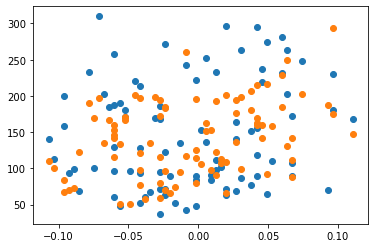

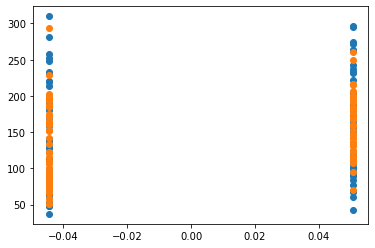

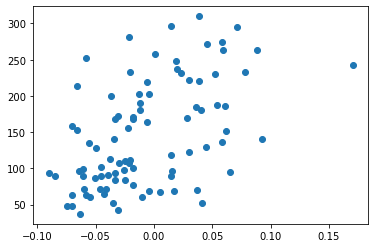

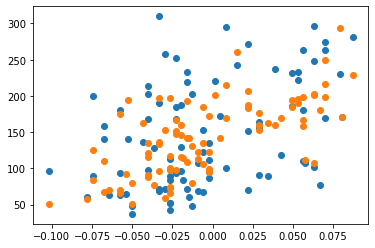

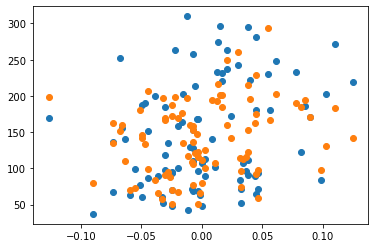

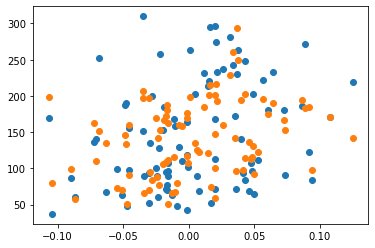

In [390]:
# 정답데이터와 예측데이터 시각화
import matplotlib.pyplot as plt

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print("MSE value: {}".format(mse))

# MSE value: 3797.8542265765213 / 1000반복수행
# MSE value: 3665.0400805361764 / 5000반복수행
# MSE value: 3311.4544585569156 / 10000 반복수행
# MSE value: 3223.452457399116 / 20000반복수행
# MSE value: 3132.7290766340884 / 40000반복수행
# MSE value: 3056.057777960592 / 80000반복수행
# MSE value: 2992.067236404054 / 160000반복수행
# MSE value: 2946.692428438714 / 320000반복수행

# Feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

plt.scatter(X_test[:, 1], y_test)
plt.scatter(X_test[:, 1], prediction)
plt.show()

plt.scatter(X_test[:, 2], y_test)
plt.show()

plt.scatter(X_test[:, 3], y_test)
plt.scatter(X_test[:, 3], prediction)
plt.show()

plt.scatter(X_test[:, 4], y_test)
plt.scatter(X_test[:, 4], prediction)
plt.show()

plt.scatter(X_test[:, 5], y_test)
plt.scatter(X_test[:, 5], prediction)
plt.show()

## 회고
1. 예측 모델을 구현해 봄으로써 컨셉을 이해하는데 많은 도움이 되었음 
2. 모델학습량을 증가함으로써 loss값이 줄어드는 것을 확인, 학습반복

###  [E-02] bike-sharing-demand

#### 1. 모듈불러오기

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_bike_train = pd.read_csv("C:/Users/z002t5wz/aiffel/bike-sharing-demand/train.csv") 
original_bike_test = pd.read_csv("C:/Users/z002t5wz/aiffel/bike-sharing-demand/test.csv") 



#### 2. Original data확인

In [295]:
original_bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [296]:
original_bike_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


#### 3. copy 및 EDA시작

In [297]:
bike_train = original_bike_train.copy()
print(bike_train)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

#### Data Fields
Data Fields<br>*datetime - hourly date  *timestamp<br>*season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
                  *holiday - whether the day is considered a holiday<br>*workingday - whether the day is neither a weekend nor holiday<br>*weather - <br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
              4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>*temp - temperature in Celsius<br>*atemp - "feels like" temperature in Celsius<br>*humidity - relative humidity<br>*windspeed - wind speed<br>*casual - number of non-registered user rentals initiated<br>*registered - number of registered user rentals initiated<br>*count - number of total rentals<br>

In [298]:
bike_train['datetime'] = pd.to_datetime(bike_train['datetime'], format='%Y-%m-%d %H:%M:%S')

'''pd.to_datetime 함수를 쓰면 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 
  DatetimeIndex 자료형 인덱스를 생성
'''
bike_train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [299]:
 pd.DatetimeIndex(bike_train['datetime']).year # bike_train['datime']의 value 반환, 위의 총 Length 와 길이가 같으므로 잘 반영이 된것 같음

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [300]:
# year, month, day, hour, minute, second 를 자료형으로 추출하여 train DataFrame에 칼럼을 추가시킴
bike_train['year'] = pd.DatetimeIndex(bike_train['datetime']).year
bike_train['month'] = pd.DatetimeIndex(bike_train['datetime']).month
bike_train['day'] = pd.DatetimeIndex(bike_train['datetime']).day
bike_train['hour'] = pd.DatetimeIndex(bike_train['datetime']).hour
bike_train['minute'] = pd.DatetimeIndex(bike_train['datetime']).minute
bike_train['second'] = pd.DatetimeIndex(bike_train['datetime']).second

bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [301]:
bike_train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

#### year, month, day별 rental status를 알아보기위해 groupby()함수를 이용해 시각화

In [303]:
grouped_year = bike_train['count'].groupby(bike_train['year']).sum()
grouped_year

year
2011     781979
2012    1303497
Name: count, dtype: int64

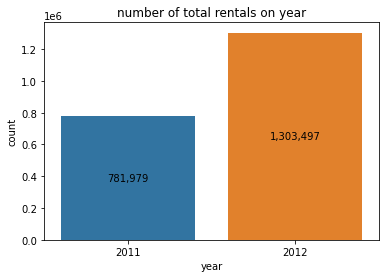

In [304]:
ax = sns.barplot(data=grouped_year.reset_index(), x='year', y='count')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('number of total rentals on year')
plt.show()

In [305]:
grouped_mth = bike_train['count'].groupby(bike_train['month']).sum()
grouped_mth

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

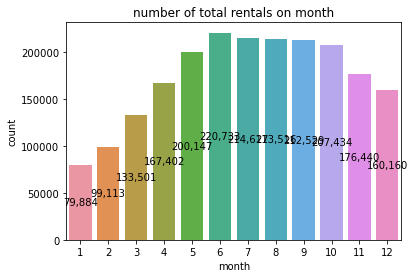

In [306]:
ax = sns.barplot(data=grouped_mth.reset_index(), x='month', y='count')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('number of total rentals on month')
plt.show()

In [307]:
grouped_day = bike_train['count'].groupby(bike_train['day']).sum()
grouped_day

day
1     103692
2     105381
3     111561
4     112335
5     109115
6     108600
7     105486
8     102770
9     108041
10    111645
11    111146
12    109257
13    111448
14    112406
15    115677
16    109837
17    118255
18    108437
19    110387
Name: count, dtype: int64

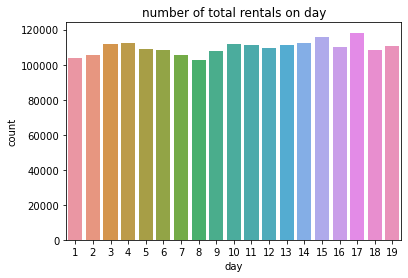

In [308]:
ax = sns.barplot(data=grouped_day.reset_index(), x='day', y='count')
containers = ax.containers[0]
#ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('number of total rentals on day')
plt.show()

In [309]:
grouped_hr = bike_train['count'].groupby(bike_train['hour']).sum()
grouped_hr

hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

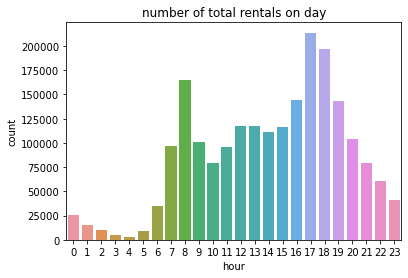

In [310]:
ax = sns.barplot(data=grouped_hr.reset_index(), x='hour', y='count')
containers = ax.containers[0]
#ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('number of total rentals on day')
plt.show()

year
2011


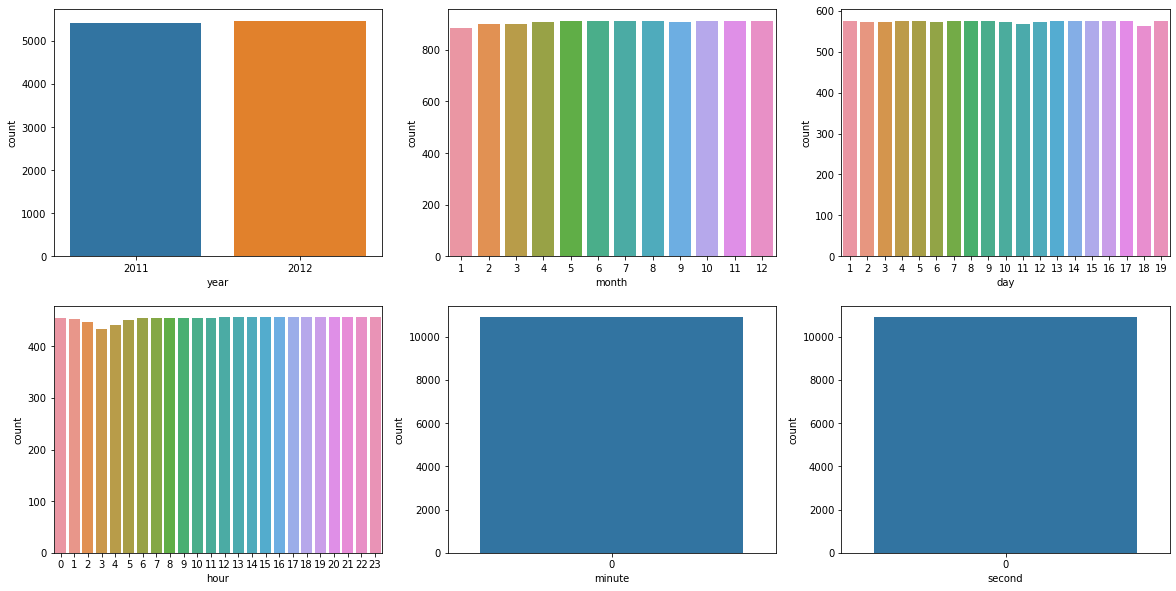

In [311]:
plt.figure(figsize=(20,10))
dateindex=['year', 'month', 'day', 'hour', 'minute', 'second']
print(dateindex[0])
print(bike_train.iloc[4,12])

plt.subplot(2,3,1)
sns.countplot(x=bike_train['year'], data=bike_train)

plt.subplot(2,3,2)
sns.countplot(x=bike_train['month'], data=bike_train)

plt.subplot(2,3,3)
sns.countplot(x=bike_train['day'], data=bike_train)

plt.subplot(2,3,4)
sns.countplot(x=bike_train['hour'], data=bike_train)

plt.subplot(2,3,5)
sns.countplot(x=bike_train['minute'], data=bike_train)

plt.subplot(2,3,6)
sns.countplot(x=bike_train['second'], data=bike_train)

plt.show()

#### 빈데이터 확인

In [312]:
bike_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [313]:
print(len(original_bike_train.columns))

12


In [314]:
print(len(bike_train.columns)) 

18


#### 1) Original Data로 학습

In [315]:
print(original_bike_train)
original_bike_train.head()

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [316]:
original_bike_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [317]:
bike_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [318]:
features =['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

In [371]:
target = 'count'

In [372]:
X = original_bike_train[features1]
print(X.shape)
X.head()

(10886, 10)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0,3,13
1,1,0,0,1,9.02,13.635,80,0.0,8,32
2,1,0,0,1,9.02,13.635,80,0.0,5,27
3,1,0,0,1,9.84,14.395,75,0.0,3,10
4,1,0,0,1,9.84,14.395,75,0.0,0,1


In [373]:
y = original_bike_train[target]
print(y.shape)
y.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

#### 2) 학습데이터, 테스트데이터 분리

In [374]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 10) (8708,)
(2178, 10) (2178,)


#### 3) 모델import

In [375]:
from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)

#### datetime 으로인해 ValueError 발생(could not convert string to float: '2011-10-05 13:00:00') --> 모델의 경우 string을 인식하지 못함,   datetime을 year, month, day, hour로 분리후 모델 수행하여 비교

In [376]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 4) 모델적용(fit) & 예측(prediction)

In [377]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([306., 232., 115., ..., 795.,  71., 209.])

In [378]:
len(y_test)

2178

In [339]:
len(y_pred)

89

#### 5) 손실값계산

In [340]:
mse = mean_squared_error(y_test, y_pred)
rsme = mse**0.5
print(mse)
print(rsme)

2900.17328788323
53.85325698491438


In [341]:
features1 =['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
X_test_df = pd.DataFrame(X_test, columns=features1)
X_test_df['y_pred'] = y_pred
X_test_df['y_test'] = y_test

In [342]:
X_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,y_pred,y_test
0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220,139.548313,219.0
1,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788,179.520306,70.0
2,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646,134.041333,202.0
3,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054,291.411936,230.0
4,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005145,-0.009362,123.787237,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.001751,-0.044642,-0.065486,-0.005671,-0.007073,-0.019476,0.041277,-0.039493,-0.003304,0.007207,115.009746,153.0
85,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349,78.958867,98.0
86,-0.027310,-0.044642,-0.063330,-0.050428,-0.089630,-0.104340,0.052322,-0.076395,-0.056158,-0.067351,81.557314,37.0
87,-0.023677,-0.044642,-0.069797,-0.064199,-0.059359,-0.050478,0.019187,-0.039493,-0.089137,-0.050783,54.377478,63.0


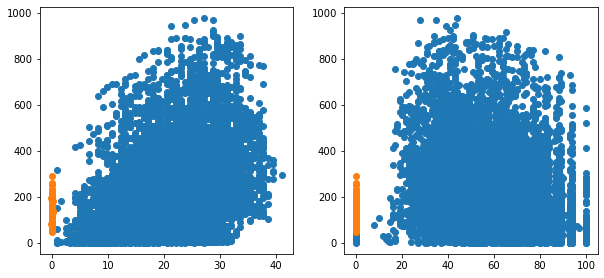

In [369]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.scatter(original_bike_train['temp'], original_bike_train['count'])
plt.scatter(X_test_df['temp'], X_test_df['y_pred'])

plt.subplot(222)
plt.scatter(original_bike_train['humidity'], original_bike_train['count'])
plt.scatter(X_test_df['humidity'], X_test_df['y_pred'])

plt.show()

#### 1') Revised Data로 학습

In [345]:
bike_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [346]:
features2 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']

In [347]:
target1 = 'count'

In [348]:
X1= bike_train[features2]
print(X1.shape)
X1.head()

(10886, 14)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4


In [349]:
y1 = bike_train[target1]
print(y1.shape)
y1.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

#### 2') 데이터분리

In [350]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


#### 3') 모델import

In [351]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

#### 4') 모델적용(fit) & 예측(prediction)

In [352]:
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
y1_pred

array([306., 232., 115., ..., 795.,  71., 209.])

In [353]:
mse = mean_squared_error(y1_test, y1_pred)
rsme = (mse)**0.5
print(mse)
print(rsme)

1.5782845144695584e-25
3.972762910707809e-13


In [354]:
features2 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']
X1_test_df = pd.DataFrame(X1_test, columns=features2)
X1_test_df['y1_pred'] = y1_pred
X1_test_df['y1_test'] = y1_test

In [355]:
X1_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,y1_pred,y1_test
10522,4,0,1,2,20.50,24.240,63,15.0013,34,272,2012,12,4,20,306.0,306
1462,2,0,1,1,20.50,24.240,31,19.9995,36,196,2011,4,6,19,232.0,232
4928,4,0,1,1,10.66,12.120,41,19.0012,10,105,2011,11,18,10,115.0,115
1286,1,0,1,1,22.14,25.760,52,19.0012,55,104,2011,3,18,11,159.0,159
8981,3,0,1,1,33.62,35.605,32,0.0000,72,176,2012,8,16,14,248.0,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4,0,1,2,17.22,21.210,94,16.9979,8,192,2012,12,17,20,200.0,200
5277,4,0,1,1,10.66,15.150,70,0.0000,4,55,2011,12,13,23,59.0,59
8432,3,0,1,1,31.16,34.090,43,15.0013,91,704,2012,7,12,17,795.0,795
5539,1,0,1,1,10.66,12.880,60,11.0014,1,70,2012,1,5,22,71.0,71


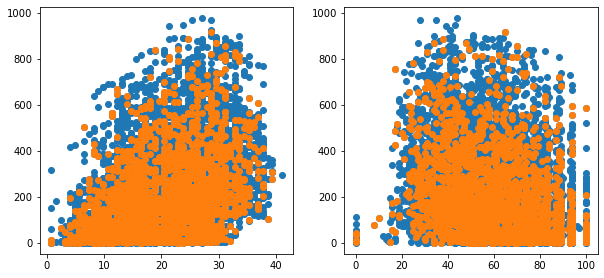

In [370]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(bike_train['temp'], bike_train['count'])
plt.scatter(X1_test_df['temp'], X1_test_df['y1_pred'])

plt.subplot(222)
plt.scatter(bike_train['humidity'], bike_train['count'])
plt.scatter(X1_test_df['humidity'], X1_test_df['y1_pred'])


plt.show()

#### 회고
1. 모델학습 전 다양한 전처리작업을 수행해가는 과정에서 모든 데이터의 이동이 객체기준으로 진행되는 것에 큰 깨달음이 있었습니다. 
2. 원데이터와 수정된 데이터를 각각 모델 수행해 봄으로써 모델의 작동방식 변수설정간의 유의점등을 배울 수 있었습니다. 
3. 전반적으로 결과물이 마음에 들지않아 제출하고 싶은 마음이 없어서... 아쉬움이 많이 남는 과제였습니다... (화이팅!!)

4. 참고:<br>https://www.kaggle.com/competitions/bike-sharing-demand/data
https://github.com/JaeHeee/AIFFEL_Project/blob/master/EXPLORATION/EXPLORATION%205.%20%EB%82%A0%EC%94%A8%20%EC%A2%8B%EC%9D%80%20%EC%9B%94%EC%9A%94%EC%9D%BC%20%EC%98%A4%ED%9B%84%20%EC%84%B8%20%EC%8B%9C%2C%20%EC%9E%90%EC%A0%84%EA%B1%B0%20%ED%83%80%EB%8A%94%20%EC%82%AC%EB%9E%8C%EC%9D%80%20%EB%AA%87%20%EB%AA%85%3F.ipynb
